In [1]:
#Supress Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import numpy and pandas packages
import numpy as np
import pandas as pd
import datetime

#import required libraries to plot
import matplotlib.pyplot as plt
import seaborn as sns

#To Scale data
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

#Feature Selection Using RFE
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from matplotlib.pyplot import xticks
%matplotlib inline

In [3]:
#Set display options
pd.set_option('display.max_columns',500)
pd.set_option('expand_frame_repr', True)

In [5]:
#Reading Datasets

# Making a list of missing value types
missing_values = ["n/a", "na", "--","NA","NaN"]

#Lead Scoring Data
lead_df = pd.read_csv(r'C:\Users\vpapn\Documents\mydocs\MC1 CASE STUDY\Lead Scoring Assignment\Leads.csv',encoding='iso-8859-1',na_values = missing_values)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

### Data understanding and Data Cleaning

In [6]:
#Print basic information about the dataset
print('Information about Leads Data:\n')
print(lead_df.info())
print('Description of Leads Data:\n', lead_df.describe())
print('Shape of Leads Data:\n',lead_df.shape)

Information about Leads Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization         

In [7]:
#Print datatypes of various columns available 
print(lead_df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

**Assumptions** <br>

From the above data we can see that in many columns we have values like Select. This option might be the result where the customer/employee assigned to the lead did not choose an option and as a result of which the data is not updated.

Replacing the Select values to NULL.<br>

In [8]:
lead_df = lead_df.replace('Select',np.nan)
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

### Data Cleaning

In [9]:
#Lets first check missing values in columns and rows in our dataset.

#Define a function to check missing values in a dataset
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100 *(data.isnull().sum()/data.isnull().count())).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [10]:
#Print missing values information
print(missing_data(lead_df))

                                               Total    Percent
How did you hear about X Education              7250  78.463203
Lead Profile                                    6855  74.188312
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                    

Insight - <br>

I see that for some of the columns of the dataset has more than or equal to 30% of missing values. We cannot drop all the columns with missing data as these columns will be useful for anlaysis

In [11]:
NA_col_30 = lead_df.isnull().sum().sort_values()
#Lets see how many columns has more than 70% missing values.
NA_col_30 = NA_col_30[NA_col_30.values >= (0.3*len(lead_df))]
print(NA_col_30)

Tags                                  3353
Specialization                        3380
City                                  3669
Asymmetrique Activity Index           4218
Asymmetrique Profile Index            4218
Asymmetrique Activity Score           4218
Asymmetrique Profile Score            4218
Lead Quality                          4767
Lead Profile                          6855
How did you hear about X Education    7250
dtype: int64


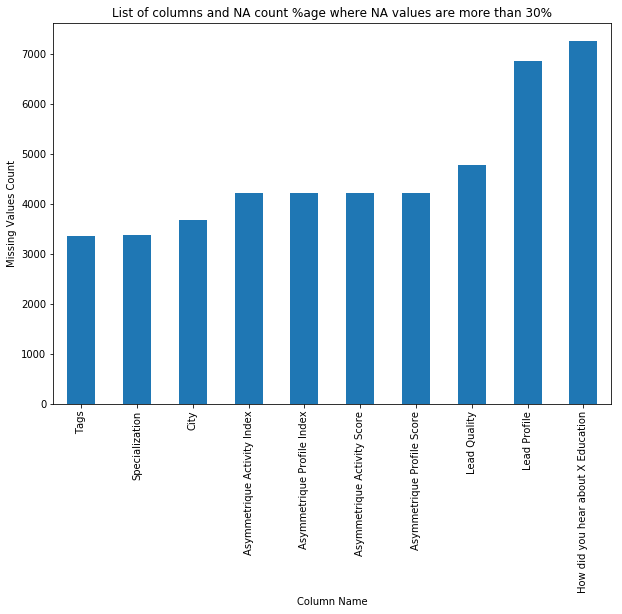

In [12]:
#Plot NA count for columns having more than 30% missing values
plt.figure(figsize=(10,7))
NA_col_30.plot(kind='bar',rot=90)
plt.title('List of columns and NA count %age where NA values are more than 30%')
plt.xlabel("Column Name")
plt.ylabel("Missing Values Count")
plt.show()

In [13]:
NA_col = lead_df.isnull().sum().sort_values()
#Lets see how many columns has more than 70% missing values.
NA_col = NA_col[NA_col.values >= (0.7*len(lead_df))]
print(NA_col)

Lead Profile                          6855
How did you hear about X Education    7250
dtype: int64


We have columns which have more than 70% missing values. Clearly, they can not provide any insight. So, lets drop them.

In [14]:
#Dropping the columns

na_col_list = NA_col.index.to_list()
lead_df = lead_df[lead_df.columns.difference(na_col_list)]
lead_df.shape

(9240, 35)

In [15]:
#Checking out rows with more than 50% or 30% missing values
#Lets check and drop records having more than 30% missing data. As they will not be able to provide a useful insight.
NA_row = (100*(lead_df.transpose().isnull().sum()/(lead_df.shape[1]))).sort_values(ascending=False)
print(NA_row[NA_row.values > (0.5 * len(lead_df))])
print(NA_row[NA_row.values > (0.3 * len(lead_df))])

Series([], dtype: float64)
Series([], dtype: float64)


Insights - Unlike Columns, there are no rows having more than 50% or 30% missing values

In [16]:
#finding columns which hae one unique value
lead_df.nunique().sort_values()

Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
Magazine                                            1
I agree to pay the amount through cheque            1
Get updates on DM Content                           1
A free copy of Mastering The Interview              2
Through Recommendations                             2
Search                                              2
Newspaper Article                                   2
Newspaper                                           2
X Education Forums                                  2
Do Not Call                                         2
Digital Advertisement                               2
Do Not Email                                        2
Converted                                           2
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
What matters most to you in choosing a course       3
Lead Quality                

We have 5 columns which have unique values "No" which has been removed from the dataset.

- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque
- Receive More Updates About Our Courses
- Magazine                                            

In [17]:
#Remove columns with only one unique values
uniq_cleaned_df= lead_df.loc[:,lead_df.nunique()!=1]
uniq_cleaned_df.shape

(9240, 30)

In [18]:
#Print missing values information
print(missing_data(uniq_cleaned_df))

                                               Total    Percent
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                             

We can see that there are still some columns with missing values in our dataset.

Out of which, few are categorical variable while others are quantitative variables.

Now, we can impute the missing values through various ways:

1. Remove those columns if we have higher proportion of missing data
2. Replace them with 
    - Mean/Median/Mode in case of quantitative variables.
    - Most repeated value in case of categorical variables.
    - By a value which gives meaning to the analysis
3. Replace with a default value
4. Leave as it is.

In [19]:
#backup of the unique values cleaned df

uniqCleaned_LeadDF = uniq_cleaned_df.copy()
uniqCleaned_LeadDF.head()

A free copy of Mastering The Interview Asymmetrique Activity Index  \
0                                     No                   02.Medium   
1                                     No                   02.Medium   
2                                    Yes                   02.Medium   
3                                     No                   02.Medium   
4                                     No                   02.Medium   

   Asymmetrique Activity Score Asymmetrique Profile Index  \
0                         15.0                  02.Medium   
1                         15.0                  02.Medium   
2                         14.0                    01.High   
3                         13.0                    01.High   
4                         15.0                    01.High   

   Asymmetrique Profile Score    City  Converted Country  \
0                        15.0     NaN          0     NaN   
1                        15.0     NaN          0   India   
2                        20.0  Mumbai          1   India   
3                        17.0  Mumbai          0   India   
4                        18.0  Mumbai          1   India   

  Digital Advertisement Do Not Call Do Not Email            Last Activity  \
0                    No          No           No  Page Visited on Website   
1                    No          No           No             Email Opened   
2                    No          No           No             Email Opened   
3                    No          No           No              Unreachable   
4                    No          No           No        Converted to Lead   

  Last Notable Activity  Lead Number              Lead Origin  \
0              Modified       660737                      API   
1          Email Opened       660728                      API   
2          Email Opened       660727  Landing Page Submission   
3              Modified       660719  Landing Page Submission   
4              Modified       660681  Landing Page Submission   

       Lead Quality     Lead Source Newspaper Newspaper Article  \
0  Low in Relevance      Olark Chat        No                No   
1               NaN  Organic Search        No                No   
2          Might be  Direct Traffic        No                No   
3          Not Sure  Direct Traffic        No                No   
4          Might be          Google        No                No   

   Page Views Per Visit                           Prospect ID Search  \
0                   0.0  7927b2df-8bba-4d29-b9a2-b6e0beafe620     No   
1                   2.5  2a272436-5132-4136-86fa-dcc88c88f482     No   
2                   2.0  8cc8c611-a219-4f35-ad23-fdfd2656bd8a     No   
3                   1.0  0cc2df48-7cf4-4e39-9de9-19797f9b38cc     No   
4                   1.0  3256f628-e534-4826-9d63-4a8b88782852     No   

            Specialization                                 Tags  \
0                      NaN          Interested in other courses   
1                      NaN                              Ringing   
2  Business Administration  Will revert after reading the email   
3    Media and Advertising                              Ringing   
4                      NaN  Will revert after reading the email   

  Through Recommendations  Total Time Spent on Website  TotalVisits  \
0                      No                            0          0.0   
1                      No                          674          5.0   
2                      No                         1532          2.0   
3                      No                          305          1.0   
4                      No                         1428          2.0   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course X Education Forums  
0                       Bette

In [20]:
df_cleaned = uniqCleaned_LeadDF.copy()
df_cleaned.columns

Index(['A free copy of Mastering The Interview', 'Asymmetrique Activity Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
       'Asymmetrique Profile Score', 'City', 'Converted', 'Country',
       'Digital Advertisement', 'Do Not Call', 'Do Not Email', 'Last Activity',
       'Last Notable Activity', 'Lead Number', 'Lead Origin', 'Lead Quality',
       'Lead Source', 'Newspaper', 'Newspaper Article', 'Page Views Per Visit',
       'Prospect ID', 'Search', 'Specialization', 'Tags',
       'Through Recommendations', 'Total Time Spent on Website', 'TotalVisits',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'X Education Forums'],
      dtype='object')

### Data Preparation

In [21]:
#Dropping Prospect Id , we can use Lead Number for analysis
df_cleaned = df_cleaned.drop('Prospect ID',axis=1)

In [22]:
#Duplicates Record Check before setting the index

any(df_cleaned.duplicated())

False

In [23]:
lead = df_cleaned.copy()

We cannot see any duplicates in the data as we have a column of Lead Number values which is unique. 
Lets set it as a index to check if there any duplicate rows

In [24]:
lead.set_index('Lead Number', inplace=True)

In [25]:
#Duplicate Reccord Check
any(lead.duplicated())

True

In [26]:
#Dropping Duplicate Records 
lead = lead[~lead.duplicated()] #1619 records are duplicate records
lead.shape

(7947, 28)

In [27]:
#Print missing values information after removing duplicates
print(missing_data(lead))

                                               Total    Percent
Lead Quality                                    3704  46.608783
Asymmetrique Activity Index                     3504  44.092110
Asymmetrique Activity Score                     3504  44.092110
Asymmetrique Profile Index                      3504  44.092110
Asymmetrique Profile Score                      3504  44.092110
City                                            2403  30.237826
Tags                                            2402  30.225242
Specialization                                  2185  27.494652
What matters most to you in choosing a course   1970  24.789229
What is your current occupation                 1951  24.550145
Country                                         1168  14.697370
Page Views Per Visit                             137   1.723921
TotalVisits                                      137   1.723921
Last Activity                                    103   1.296087
Lead Source                             

In [28]:
df_lead = lead.copy()

In [29]:
# Converting Lead Number from index into a column
df_lead.reset_index(level='Lead Number', inplace=True)
df_lead.head(2)

Lead Number A free copy of Mastering The Interview  \
0       660737                                     No   
1       660728                                     No   

  Asymmetrique Activity Index  Asymmetrique Activity Score  \
0                   02.Medium                         15.0   
1                   02.Medium                         15.0   

  Asymmetrique Profile Index  Asymmetrique Profile Score City  Converted  \
0                  02.Medium                        15.0  NaN          0   
1                  02.Medium                        15.0  NaN          0   

  Country Digital Advertisement Do Not Call Do Not Email  \
0     NaN                    No          No           No   
1   India                    No          No           No   

             Last Activity Last Notable Activity Lead Origin  \
0  Page Visited on Website              Modified         API   
1             Email Opened          Email Opened         API   

       Lead Quality     Lead Source Newspaper Newspaper Article  \
0  Low in Relevance      Olark Chat        No                No   
1               NaN  Organic Search        No                No   

   Page Views Per Visit Search Specialization                         Tags  \
0                   0.0     No            NaN  Interested in other courses   
1                   2.5     No            NaN                      Ringing   

  Through Recommendations  Total Time Spent on Website  TotalVisits  \
0                      No                            0          0.0   
1                      No                          674          5.0   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   

  What matters most to you in choosing a course X Education Forums  
0                       Better Career Prospects                 No  
1                       Better Career Prospects                 No

In [30]:
df_lead.shape

(7947, 29)

In [31]:
#I see that there are a lot of binary categorical columns in our dataset. Lets check variance of yes/no for those fields.

yes_no_col_df = pd.DataFrame()
yes_no_col_list = ['A free copy of Mastering The Interview','Do Not Call', 'Do Not Email', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',  'Search','Through Recommendations']
for i in yes_no_col_list:
    yes_no_col_df[i] = df_lead[i].value_counts()

yes_no_col_df.head()

A free copy of Mastering The Interview  Do Not Call  Do Not Email  \
No                                     5059         7945          7251   
Yes                                    2888            2           696   

     Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
No                7945                7946       7946                   7943   
Yes                  2                   1          1                      4   

     Search  Through Recommendations  
No     7933                     7940  
Yes      14                        7

Insights - 
I see that below columns - 
- 'Do Not Call',
- 'Newspaper Article',
- 'X Education Forums', 
- 'Newspaper',
- 'Digital Advertisement',
- 'Through Recommendations',
- 'Search'

have very less variation in their values. Lets Drop the columns

In [32]:
df_lead = df_lead.drop(['Do Not Call','Newspaper Article','X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Search'],axis=1)

In [33]:
df_lead.shape

(7947, 22)

In [34]:
#Print missing values information
print(missing_data(df_lead))

                                               Total    Percent
Lead Quality                                    3704  46.608783
Asymmetrique Activity Index                     3504  44.092110
Asymmetrique Activity Score                     3504  44.092110
Asymmetrique Profile Index                      3504  44.092110
Asymmetrique Profile Score                      3504  44.092110
City                                            2403  30.237826
Tags                                            2402  30.225242
Specialization                                  2185  27.494652
What matters most to you in choosing a course   1970  24.789229
What is your current occupation                 1951  24.550145
Country                                         1168  14.697370
TotalVisits                                      137   1.723921
Page Views Per Visit                             137   1.723921
Last Activity                                    103   1.296087
Lead Source                             

### Manage Null values in the columns. 


In [35]:
df  = df_lead.copy()
df.shape

(7947, 22)

NaN                  3704
Might be             1434
Not Sure             1073
High in Relevance     614
Low in Relevance      573
Worst                 549
Name: Lead Quality, dtype: int64

Count of missing values 3704


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

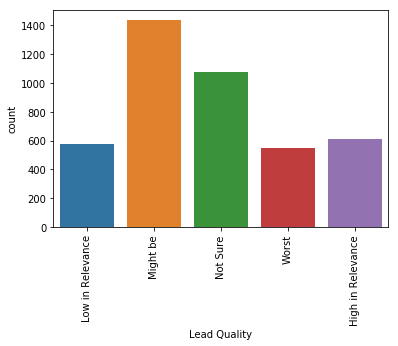

In [36]:
#Lead Quality
print(df['Lead Quality'].value_counts(dropna=False))
print("\nCount of missing values",df['Lead Quality'].isnull().sum())

sns.countplot(df['Lead Quality'])
xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

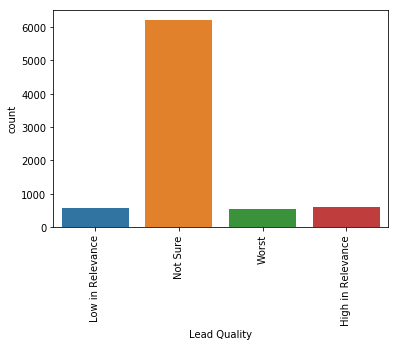

In [37]:
#We can combine Might be and Not sure as one column as we are unsure of the result.and since the blank values  
#might be present as the employee was not sure of the quality of the lead, we can replace null values with Not sure as well

df['Lead Quality'].replace(['Might be',np.nan],'Not Sure',inplace=True)
df['Lead Quality'].value_counts()

sns.countplot(df['Lead Quality'])
xticks(rotation = 90)

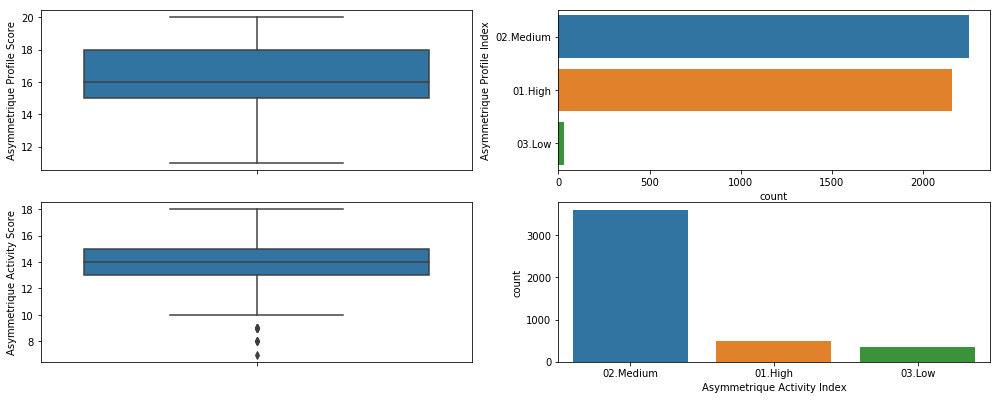

In [38]:
#Asymmetrique Profile Score,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Activity Index

fig=plt.figure(figsize=(17,10))
plt.subplot(321)
sns.boxplot(y=df['Asymmetrique Profile Score'])
plt.subplot(322)
sns.countplot(y=df['Asymmetrique Profile Index'])
plt.subplot(323)
sns.boxplot(y=df['Asymmetrique Activity Score'])
plt.subplot(324)
sns.countplot(df['Asymmetrique Activity Index'])
plt.show()

Dropping the above columns instead of imputing them as I can see a lot of variation and it has around 45% missing values and imputing them might not be good for further analysis

In [39]:
df = df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'],axis=1)
df.shape

(7947, 18)

Mumbai                         3205
Thane & Outskirts               745
Other Cities                    685
Other Cities of Maharashtra     455
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Count of missing values 2403


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

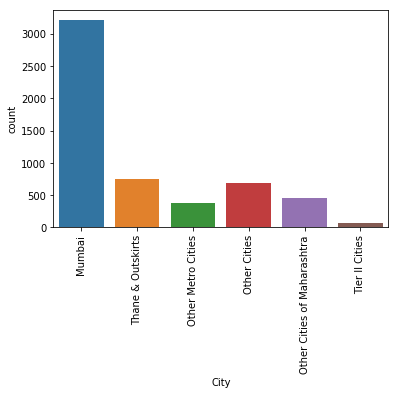

In [40]:
#City
print(df['City'].value_counts())
print("\nCount of missing values",df['City'].isnull().sum())

sns.countplot(df['City'])
xticks(rotation = 90)

In [41]:
#Lets see if it is possible to calculate City with the help of Country Column.
df.groupby('Country')['City'].value_counts().head(20)

Country     City                       
Australia   Mumbai                         6
            Thane & Outskirts              3
            Other Cities                   2
Bahrain     Other Cities                   2
            Thane & Outskirts              2
            Mumbai                         1
            Other Cities of Maharashtra    1
            Tier II Cities                 1
Bangladesh  Other Cities                   2
Belgium     Mumbai                         1
            Thane & Outskirts              1
Canada      Mumbai                         3
China       Mumbai                         1
Denmark     Other Cities                   1
France      Other Cities                   2
            Other Cities of Maharashtra    2
            Other Metro Cities             2
Germany     Mumbai                         1
            Other Cities                   1
            Other Cities of Maharashtra    1
Name: City, dtype: int64

In [42]:
#I see that Country and City columns have a lot of disrepences. Hence they both don't like reliable columns.
#Dropping both City and Country columns
df = df.drop(['City','Country'],axis=1)

In [43]:
df.shape

(7947, 16)

In [44]:
#What is your current occupation

#Lets see if it is possible to impute missing values on the basis of Specialization
pd.DataFrame(df.groupby('Specialization')['What is your current occupation'].value_counts()).unstack()

What is your current occupation            \
What is your current occupation                       Businessman Housewife   
Specialization                                                                
Banking, Investment And Insurance                             NaN       NaN   
Business Administration                                       1.0       1.0   
E-Business                                                    NaN       NaN   
E-COMMERCE                                                    1.0       NaN   
Finance Management                                            NaN       3.0   
Healthcare Management                                         1.0       1.0   
Hospitality Management                                        NaN       NaN   
Human Resource Management                                     NaN       3.0   
IT Projects Management                                        1.0       NaN   
International Business                                        NaN       NaN   
Marketing Management                                          2.0       NaN   
Media and Advertising                                         NaN       2.0   
Operations Management                                         NaN       NaN   
Retail Management                                             NaN       NaN   
Rural and Agribusiness                                        NaN       NaN   
Services Excellence                                           NaN       NaN   
Supply Chain Management                                       NaN       NaN   
Travel and Tourism                                            NaN       NaN   

                                                            \
What is your current occupation   Other Student Unemployed   
Specialization                                               
Banking, Investment And Insurance   NaN    14.0      219.0   
Business Administration             3.0     6.0      255.0   
E-Business                          NaN     1.0       40.0   
E-COMMERCE                          NaN     1.0       72.0   
Finance Management                  1.0    24.0      619.0   
Healthcare Management               1.0     7.0       90.0   
Hospitality Management              NaN     4.0       69.0   
Human Resource Management           1.0    19.0      549.0   
IT Projects Management              NaN     6.0      236.0   
International Business              NaN     4.0      125.0   
Marketing Management                6.0    15.0      529.0   
Media and Advertising               2.0     1.0      139.0   
Operations Management               1.0     5.0      308.0   
Retail Management                   NaN     2.0       68.0   
Rural and Agribusiness              NaN     4.0       49.0   
Services Excellence                 NaN     NaN       22.0   
Supply Chain Management             NaN     5.0      228.0   
Travel and Tourism                  NaN     4.0      132.0   

                                                        
What is your current occupation   Working Professional  
Specialization                                          
Banking, Investment And Insurance                 31.0  
Business Administration                           43.0  
E-Business                                         2.0  
E-COMMERCE                                         7.0  
Finance Management                                95.0  
Healthcare Management                             24.0  
Hospitality Management                            20.0  
Human Resource Management                         85.0  
IT Projects Management                            35.0  
International Business                             9.0  
Marketing Management                              91.0  
Media and Advertising                             18.0  
Operations Management                             70.0  
Retail Management                                  8.0  
Rural and Agribusiness                             5.0  
Services Excellence                          

In [45]:
#I see that in each Specialization, Uneamployed people are having more ratio. So, lets replace missing values with Unemployed

Unemployed              7097
Working Professional     634
Student                  182
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

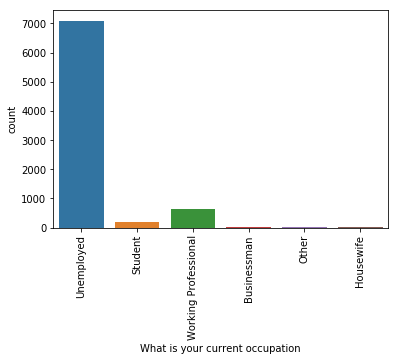

In [46]:
#Replacing with Unemployed most frequent value
df['What is your current occupation'].replace(np.nan,'Unemployed',inplace=True)
print(df['What is your current occupation'].value_counts())

sns.countplot(df['What is your current occupation'])
xticks(rotation = 90)

Better Career Prospects      5974
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Count of missing values 1970


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

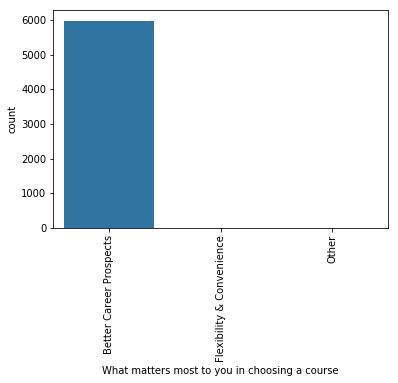

In [47]:
#What matters most to you in choosing a course

print(df['What matters most to you in choosing a course'].value_counts())
print("\nCount of missing values",df['What matters most to you in choosing a course'].isnull().sum())


sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation = 90)

Better Career Prospects      7944
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

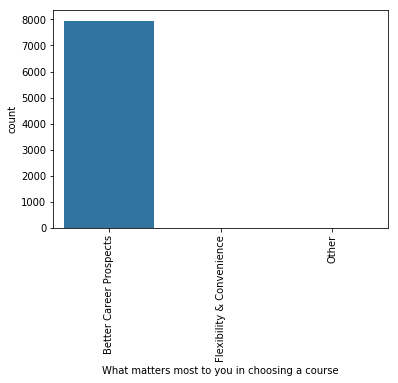

In [48]:
#Since "Better Career Prospects" is the most populated value, replacing the null with this.
df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects',inplace=True)
print(df['What matters most to you in choosing a course'].value_counts())

sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation = 90)

We can drop this column, as most of the values have the same value 'Better Career Prospects'

In [49]:
df = df.drop(['What matters most to you in choosing a course'],axis=1)
df.shape

(7947, 15)

Google               2868
Direct Traffic       2543
Organic Search       1154
Olark Chat            669
Reference             402
Referral Sites        125
Welingak Website       73
Facebook               52
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
welearnblog_Home        1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

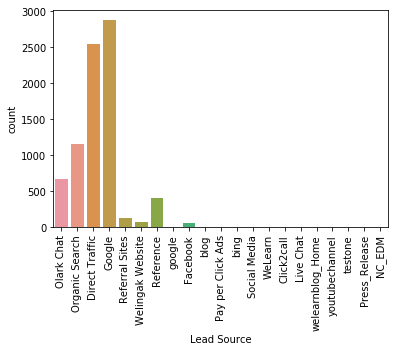

In [50]:
#Lead Source
print(df['Lead Source'].value_counts())

sns.countplot(df['Lead Source'])
xticks(rotation = 90)

In [51]:
#Looking at the values, it is clear that few values can be replaced.
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Facebook','blog','youtubechannel','NC_EDM','welearnblog_Home'], 'Social Media')
df['Lead Source'] = df['Lead Source'].replace(['Olark Chat','Click2call'],'Live Chat')
df['Lead Source'] = df['Lead Source'].replace(['WeLearn','Welingak Website'],'Other Learning sites')
df['Lead Source'] = df['Lead Source'].replace(['testone','Pay per Click Ads','bing','Referral Sites','Reference','Press_Release'],'Others')

In [52]:
print(df['Lead Source'].value_counts())

Google                  2873
Direct Traffic          2543
Organic Search          1154
Live Chat                675
Others                   537
Other Learning sites      74
Social Media              58
Name: Lead Source, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

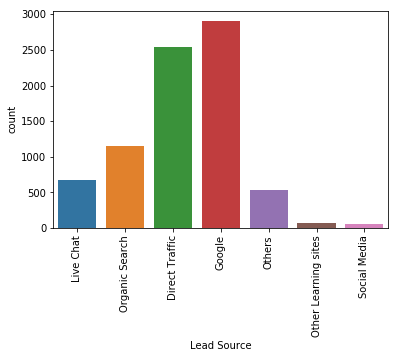

In [53]:
#Since "Google" is the most populated value, replacing the null with this.
df['Lead Source'].replace(np.nan,'Google',inplace=True)
df['Lead Source'].value_counts()

sns.countplot(df['Lead Source'])
xticks(rotation = 90)

Converted  Last Activity               
0          Email Opened                    1896
           SMS Sent                         966
           Page Visited on Website          484
           Olark Chat Conversation          392
           Converted to Lead                374
           Email Bounced                    277
           Email Link Clicked               153
           Form Submitted on Website         88
           Unreachable                       62
           Unsubscribed                      45
           NaN                               22
           Had a Phone Conversation           8
           View in browser link Clicked       5
           Visited Booth in Tradeshow         1
1          SMS Sent                        1456
           Email Opened                    1141
           Page Visited on Website          151
           NaN                               81
           Olark Chat Conversation           81
           Email Link Clicked                72


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

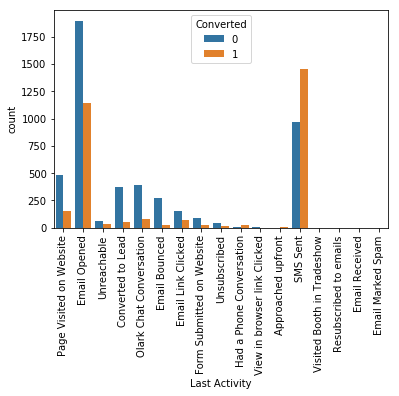

In [54]:
#Last Activity
#As we don't want to change disribution of this column Lets see most repeated last activity of converted and unconverted customers.
print(df.groupby('Converted')['Last Activity'].value_counts(dropna=False))

sns.countplot(df['Last Activity'], hue=df['Converted'])
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

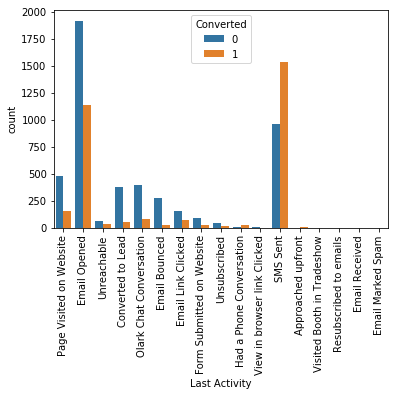

In [55]:
#Since "Email Opened" is the most populated value, replacing the null with this.
df['Last Activity'] = df.groupby('Converted')['Last Activity'].transform(lambda x:x.fillna(x.mode().values[0]))
df['Last Activity'].value_counts()

sns.countplot(df['Last Activity'], hue=df['Converted'])
xticks(rotation = 90)

In [56]:
#Insights - We can see that distribution of the column is not changed.

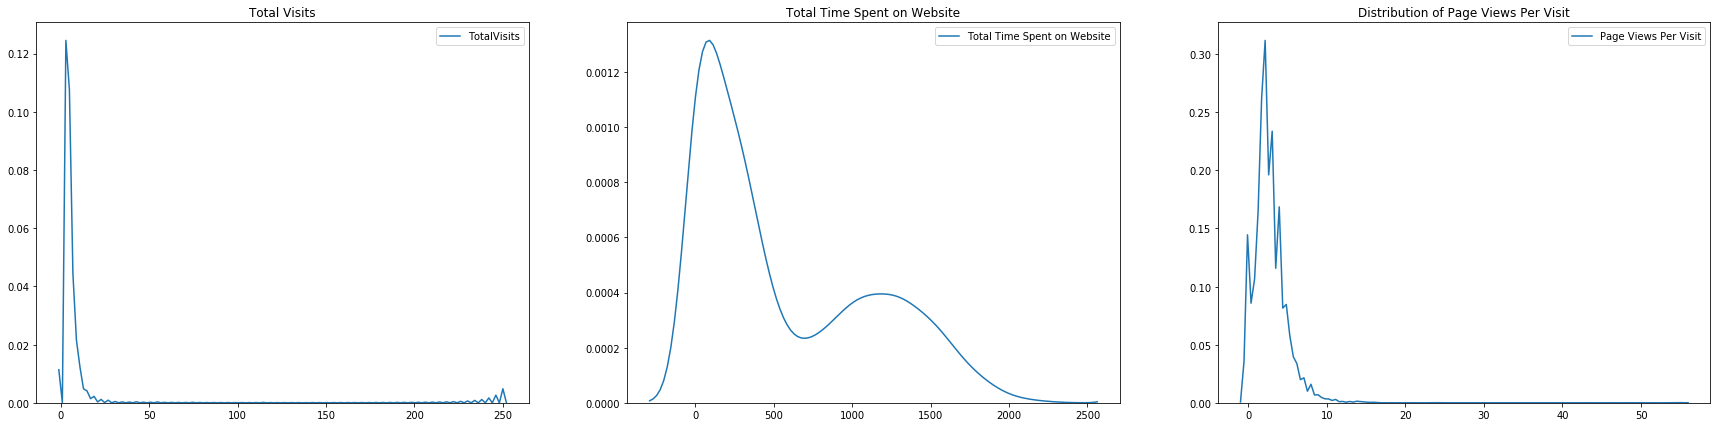

In [57]:
#TotalVisits, Total Time Spent on Website and Page Views Per Visit

plt.figure(figsize=(30,7))
plt.subplot(131)
sns.kdeplot(df['TotalVisits'], shade_lowest=True, legend='Total Visits')
#sns.kdeplot(df[df['Converted']==0]['TotalVisits'], legend='Non-Converted')
plt.title("Total Visits")
plt.subplot(132)
sns.kdeplot(df['Total Time Spent on Website'], shade_lowest=True, legend='Total Time Spent on Website')
#sns.kdeplot(df[df['Converted']==0]['Total Time Spent on Website'], legend='Non-Converted')
plt.title("Total Time Spent on Website")
plt.subplot(133)
sns.kdeplot(df['Page Views Per Visit'], shade_lowest=True, legend='Page Visits per Visit')
#sns.kdeplot(df[df['Converted']==0]['Page Views Per Visit'], legend='Non-Converted')
plt.title("Distribution of Page Views Per Visit")
plt.show()
#help(sns.kdeplot)

Imputing with median values for the outliers.
- TotalVisits 
- Total Time Spent on Website
- Page Views Per Visit                                                                                             

In [58]:
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)
df['Total Time Spent on Website'].fillna(df['Total Time Spent on Website'].median(), inplace=True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)

In [59]:
print(missing_data(df))

                                        Total    Percent
Tags                                     2402  30.225242
Specialization                           2185  27.494652
What is your current occupation             0   0.000000
TotalVisits                                 0   0.000000
Total Time Spent on Website                 0   0.000000
Page Views Per Visit                        0   0.000000
Lead Source                                 0   0.000000
Lead Quality                                0   0.000000
Lead Origin                                 0   0.000000
Last Notable Activity                       0   0.000000
Last Activity                               0   0.000000
Do Not Email                                0   0.000000
Converted                                   0   0.000000
A free copy of Mastering The Interview      0   0.000000
Lead Number                                 0   0.000000


Finance Management                   956
Human Resource Management            829
Marketing Management                 803
Operations Management                492
Business Administration              398
IT Projects Management               366
Supply Chain Management              347
Banking, Investment And Insurance    333
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                158
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Count of missing values 2185


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

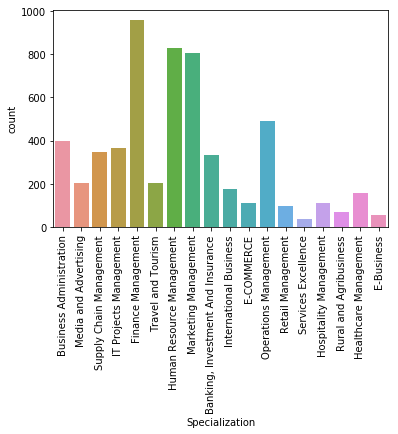

In [60]:
#Specialization                           

print(df['Specialization'].value_counts())
print("\nCount of missing values",df['Specialization'].isnull().sum())

sns.countplot(df['Specialization'])
xticks(rotation = 90)

In [61]:
#Since we have many management related values, we can group them as 1
df['Specialization'] = df['Specialization'].replace(['Business Administration','Finance Management','Human Resource Management','Marketing Management', 'Operations Management', 'IT Projects Management', 'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 'Retail Management'], 'Management')
df['Specialization'].value_counts()

Management                           4563
Banking, Investment And Insurance     333
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

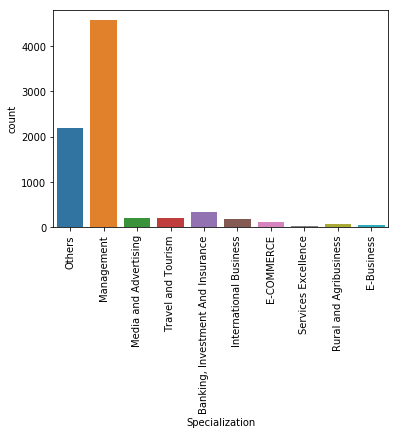

In [62]:
#adding a value as "Others" for missing values as the lead might not have had the option for his specialization
df['Specialization'].replace(np.nan,'Others',inplace=True)
df['Specialization'].value_counts()

sns.countplot(df['Specialization'])
xticks(rotation = 90)

NaN                                                  2402
Will revert after reading the email                  1916
Ringing                                              1143
Interested in other courses                           472
Already a student                                     405
Closed by Horizzon                                    346
switched off                                          239
Busy                                                  186
Lost to EINS                                          172
Not doing further education                           143
Interested  in full time MBA                          116
Graduation in progress                                108
invalid number                                         83
Diploma holder (Not Eligible)                          60
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

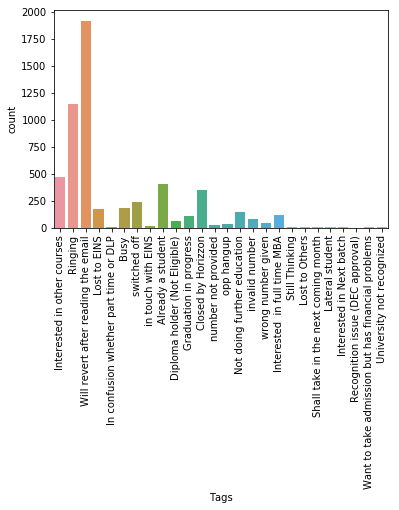

In [63]:
#Tags                                     

print(df['Tags'].value_counts(dropna=False))
print("\nCount of missing values",df['Tags'].isnull().sum())

sns.countplot(df['Tags'])
xticks(rotation = 90)

Converted  What is your current occupation  Tags                                             
0          Businessman                      NaN                                                     1
                                            Interested in other courses                             1
                                            Will revert after reading the email                     1
           Other                            Graduation in progress                                  2
                                            Not doing further education                             2
                                            Already a student                                       1
                                            Interested in other courses                             1
           Student                          Already a student                                      70
                                            NaN                                           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

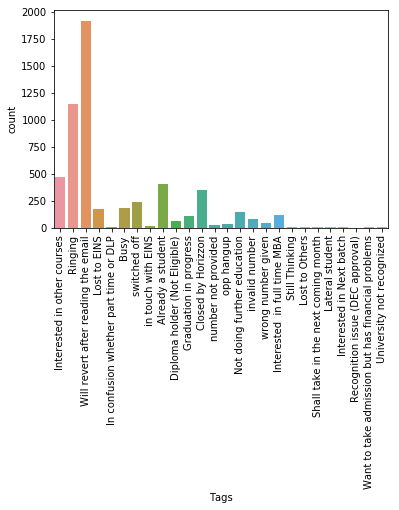

In [64]:
#As Tags column has 2402 missing values and imputing it with mode can lead to distribution of this column.
#So, lets see its distribution for converted and non-converted customers
print(df.groupby(['Converted', 'What is your current occupation'])['Tags'].value_counts(dropna=False))
sns.countplot(df['Tags'])
xticks(rotation = 90)

In [65]:
#Lets convert missing values by median of each category of customers.
df['Tags'] = df.groupby(['Converted','What is your current occupation'])['Tags'].transform(lambda x:x.fillna(x.mode().values[0]))

In [66]:
#Replacing the low frequency values less than 50 to Others

df['Tags'] = df['Tags'].replace(['Lost to Others','Want to take admission but has financial problems',
                                'Still Thinking','Interested in Next batch','In confusion whether part time or DLP',
                                'Lateral student','University not recognized','Shall take in the next coming month',
                                'Recognition issue (DEC approval)','wrong number given','opp hangup',
                                'number not provided','in touch with EINS'],'Others')
df['Tags'].value_counts()

Ringing                                2906
Will revert after reading the email    2536
Interested in other courses             478
Already a student                       418
Closed by Horizzon                      346
switched off                            239
Busy                                    186
Lost to EINS                            172
Others                                  156
Not doing further education             143
Interested  in full time MBA            116
Graduation in progress                  108
invalid number                           83
Diploma holder (Not Eligible)            60
Name: Tags, dtype: int64

In [67]:
df['Tags'] = df['Tags'].replace(['invalid number','Diploma holder (Not Eligible)',
                                'Not doing further education','Interested  in full time MBA',
                                'Graduation in progress','Interested in other courses',
                                'Already a student'],'Others')
df['Tags'].value_counts(dropna=False)

Ringing                                2906
Will revert after reading the email    2536
Others                                 1562
Closed by Horizzon                      346
switched off                            239
Busy                                    186
Lost to EINS                            172
Name: Tags, dtype: int64

In [68]:
print(missing_data(df))

                                        Total  Percent
What is your current occupation             0      0.0
TotalVisits                                 0      0.0
Total Time Spent on Website                 0      0.0
Tags                                        0      0.0
Specialization                              0      0.0
Page Views Per Visit                        0      0.0
Lead Source                                 0      0.0
Lead Quality                                0      0.0
Lead Origin                                 0      0.0
Last Notable Activity                       0      0.0
Last Activity                               0      0.0
Do Not Email                                0      0.0
Converted                                   0      0.0
A free copy of Mastering The Interview      0      0.0
Lead Number                                 0      0.0


In [69]:
#Print basic information about the dataset
print('Information about Leads Data:\n')
print(df.info())
print('Description of Leads Data:\n', df.describe())
print('Shape of Leads Data:\n',df.shape)

Information about Leads Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7947 entries, 0 to 7946
Data columns (total 15 columns):
Lead Number                               7947 non-null int64
A free copy of Mastering The Interview    7947 non-null object
Converted                                 7947 non-null int64
Do Not Email                              7947 non-null object
Last Activity                             7947 non-null object
Last Notable Activity                     7947 non-null object
Lead Origin                               7947 non-null object
Lead Quality                              7947 non-null object
Lead Source                               7947 non-null object
Page Views Per Visit                      7947 non-null float64
Specialization                            7947 non-null object
Tags                                      7947 non-null object
Total Time Spent on Website               7947 non-null int64
TotalVisits                               794

In [70]:
#I see that TotalVisits has been imported with float datatype.
#Lets convert it into int type

df['TotalVisits'] = df['TotalVisits'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7947 entries, 0 to 7946
Data columns (total 15 columns):
Lead Number                               7947 non-null int64
A free copy of Mastering The Interview    7947 non-null object
Converted                                 7947 non-null int64
Do Not Email                              7947 non-null object
Last Activity                             7947 non-null object
Last Notable Activity                     7947 non-null object
Lead Origin                               7947 non-null object
Lead Quality                              7947 non-null object
Lead Source                               7947 non-null object
Page Views Per Visit                      7947 non-null float64
Specialization                            7947 non-null object
Tags                                      7947 non-null object
Total Time Spent on Website               7947 non-null int64
TotalVisits                               7947 non-null int32
What is your c

### Outlier Check

In [71]:
#Find the numeric columns
numerictype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #List containing the different numeric datatypes
numeric_columns_df_lead = df.select_dtypes(include = numerictype).columns
print(numeric_columns_df_lead)

Index(['Lead Number', 'Converted', 'Page Views Per Visit',
       'Total Time Spent on Website', 'TotalVisits'],
      dtype='object')


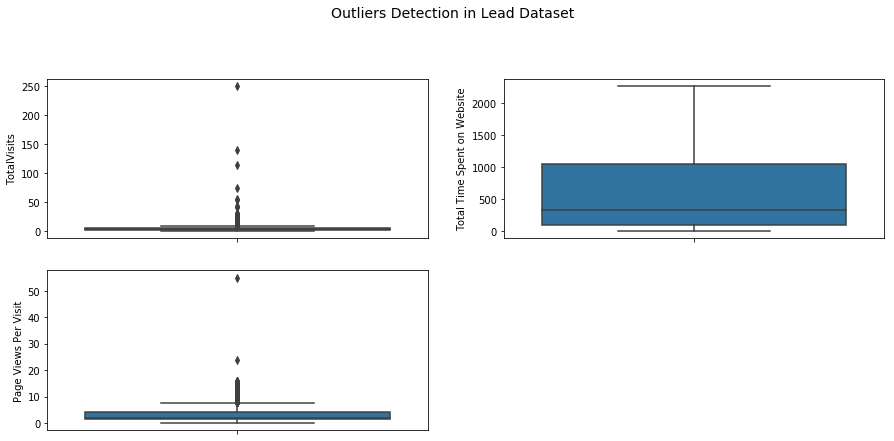

In [72]:
#Checking for outliers in TotalVisits, Total Time Spent on Website, and Page Views Per Visit
fig=plt.figure(figsize=(15,10))
fig.suptitle("Outliers Detection in Lead Dataset", fontsize=14)
plt.subplot(321)
sns.boxplot(y=df['TotalVisits'])
plt.subplot(322)
sns.boxplot(y=df['Total Time Spent on Website'])
plt.subplot(323)
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

We have Outliers in our dataset.

### Outlier Treatment

In [73]:
df.describe(percentiles=[0.05,0.10,.25,.5,.75,.90,.95,.99])

Lead Number    Converted  Page Views Per Visit  \
count    7947.000000  7947.000000           7947.000000   
mean   617842.957217     0.399396              2.742554   
std     23759.060545     0.489805              2.073638   
min    579533.000000     0.000000              0.000000   
5%     582722.800000     0.000000              0.000000   
10%    586152.800000     0.000000              0.000000   
25%    596564.500000     0.000000              1.600000   
50%    616506.000000     0.000000              2.090000   
75%    638762.500000     1.000000              4.000000   
90%    651628.600000     1.000000              5.000000   
95%    655896.000000     1.000000              6.000000   
99%    659700.320000     1.000000              9.000000   
max    660737.000000     1.000000             55.000000   

       Total Time Spent on Website  TotalVisits  
count                  7947.000000  7947.000000  
mean                    567.048194     3.998112  
std                     551.540519     4.976423  
min                       0.000000     0.000000  
5%                        0.000000     0.000000  
10%                       0.000000     0.000000  
25%                     103.000000     2.000000  
50%                     333.000000     3.000000  
75%                    1046.000000     5.000000  
90%                    1429.000000     8.000000  
95%                    1591.700000    10.000000  
99%                    1851.540000    18.000000  
max                    2272.000000   251.000000

In [74]:
df_without_outliers = df.copy()

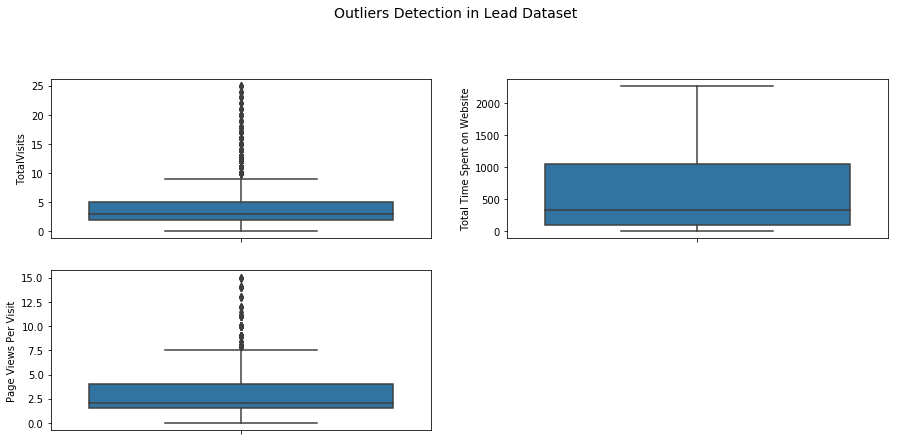

In [75]:
#I see alot of outliers in Total Visits and Page Views Per Visit
#Lets see last 1% values of these outliers

# outlier treatment for TotalVisits
Q1 = df_without_outliers.TotalVisits.quantile(0.05)
Q3 = df_without_outliers.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
df_without_outliers = df_without_outliers[(df_without_outliers.TotalVisits >= Q1 - 1.5*IQR) & (df_without_outliers.TotalVisits <= Q3 + 1.5*IQR)]


# outlier treatment for income
Q1 = df_without_outliers['Page Views Per Visit'].quantile(0.05)
Q3 = df_without_outliers['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
df_without_outliers = df_without_outliers[(df_without_outliers['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df_without_outliers['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

fig=plt.figure(figsize=(15,10))
fig.suptitle("Outliers Detection in Lead Dataset", fontsize=14)
plt.subplot(321)
sns.boxplot(y=df_without_outliers['TotalVisits'])
plt.subplot(322)
sns.boxplot(y=df_without_outliers['Total Time Spent on Website'])
plt.subplot(323)
sns.boxplot(y=df_without_outliers['Page Views Per Visit'])
plt.show()

We still have outliers. but we are not removing them as of now.

In [76]:
#creating a copy of a dataframe without outliers

NoOutliers_df = df_without_outliers.copy()
NoOutliers_df.shape

(7921, 15)

In [77]:
NoOutliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7946
Data columns (total 15 columns):
Lead Number                               7921 non-null int64
A free copy of Mastering The Interview    7921 non-null object
Converted                                 7921 non-null int64
Do Not Email                              7921 non-null object
Last Activity                             7921 non-null object
Last Notable Activity                     7921 non-null object
Lead Origin                               7921 non-null object
Lead Quality                              7921 non-null object
Lead Source                               7921 non-null object
Page Views Per Visit                      7921 non-null float64
Specialization                            7921 non-null object
Tags                                      7921 non-null object
Total Time Spent on Website               7921 non-null int64
TotalVisits                               7921 non-null int32
What is your c

In [78]:
NoOutliers_df.describe(percentiles=[0.05,0.10,.25,.5,.75,.90,.95,.99])

Lead Number    Converted  Page Views Per Visit  \
count    7921.000000  7921.000000           7921.000000   
mean   617864.184825     0.399823              2.721319   
std     23765.983052     0.489893              1.945983   
min    579533.000000     0.000000              0.000000   
5%     582718.000000     0.000000              0.000000   
10%    586145.000000     0.000000              0.000000   
25%    596565.000000     0.000000              1.570000   
50%    616561.000000     0.000000              2.090000   
75%    638851.000000     1.000000              4.000000   
90%    651642.000000     1.000000              5.000000   
95%    655899.000000     1.000000              6.000000   
99%    659702.400000     1.000000              9.000000   
max    660737.000000     1.000000             15.000000   

       Total Time Spent on Website  TotalVisits  
count                  7921.000000  7921.000000  
mean                    567.446787     3.853301  
std                     551.832194     3.215130  
min                       0.000000     0.000000  
5%                        0.000000     0.000000  
10%                       0.000000     0.000000  
25%                     103.000000     2.000000  
50%                     333.000000     3.000000  
75%                    1046.000000     5.000000  
90%                    1430.000000     8.000000  
95%                    1593.000000    10.000000  
99%                    1851.800000    16.000000  
max                    2272.000000    25.000000

In [79]:
#Derived Metrics - Ltes now see effect of these 3 columns on conversion of a customer
#Creating Bins for Numeric Columns to visualise the data

TimeSpent= list(NoOutliers_df['Total Time Spent on Website'].quantile([0.25, 0.5,0.75,1]).values)
TimeSpent.insert(0,0)
print("Time Spend : ",TimeSpent)

TotalVisits = list(NoOutliers_df['TotalVisits'].quantile([0.25, 0.5,0.75,1]).values)
TotalVisits.insert(0,0)
print("Visits : ",TotalVisits)

PageViewsPerVisit = list(NoOutliers_df['Page Views Per Visit'].quantile([0.25, 0.5,0.75,1]).values)
PageViewsPerVisit.insert(0,0)
print("Page View : ",PageViewsPerVisit)

Time Spend :  [0, 103.0, 333.0, 1046.0, 2272.0]
Visits :  [0, 2.0, 3.0, 5.0, 25.0]
Page View :  [0, 1.57, 2.09, 4.0, 15.0]


In [80]:
#Creating a new column
NoOutliers_df.loc[(NoOutliers_df.TotalVisits < 1),'Visits'] = 'less than 1'
NoOutliers_df.loc[(NoOutliers_df.TotalVisits >= 1) & (NoOutliers_df.TotalVisits <= 5), 'Visits'] = '1 - 5'
NoOutliers_df.loc[(NoOutliers_df.TotalVisits > 5) & (NoOutliers_df.TotalVisits <= 10), 'Visits'] = '6 - 10'
NoOutliers_df.loc[(NoOutliers_df.TotalVisits > 10) & (NoOutliers_df.TotalVisits <= 15), 'Visits'] = '11 - 15'
NoOutliers_df.loc[(NoOutliers_df.TotalVisits > 15) & (NoOutliers_df.TotalVisits <= 20), 'Visits'] = '16 - 20'
NoOutliers_df.loc[(NoOutliers_df.TotalVisits > 20) & (NoOutliers_df.TotalVisits <= 25), 'Visits'] = '21 - 25'
NoOutliers_df.loc[(NoOutliers_df.TotalVisits > 25),'Visits'] = 'greater than 25'

In [81]:
print(NoOutliers_df['Visits'].value_counts())

1 - 5          5421
6 - 10         1277
less than 1     896
11 - 15         233
16 - 20          70
21 - 25          24
Name: Visits, dtype: int64


In [82]:
#Creating a new column
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] < 1),'SpentTime'] = 'less than 1'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] >= 1) & (NoOutliers_df['Total Time Spent on Website'] <= 100), 'SpentTime'] = '1 - 100'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 100) & (NoOutliers_df['Total Time Spent on Website'] <= 200), 'SpentTime'] = '101 - 200'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 200) & (NoOutliers_df['Total Time Spent on Website'] <= 300), 'SpentTime'] = '201 - 300'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 300) & (NoOutliers_df['Total Time Spent on Website'] <= 400), 'SpentTime'] = '301 - 400'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 400) & (NoOutliers_df['Total Time Spent on Website'] <= 500), 'SpentTime'] = '401 - 500'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 500) & (NoOutliers_df['Total Time Spent on Website'] <= 600), 'SpentTime'] = '501 - 600'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 600) & (NoOutliers_df['Total Time Spent on Website'] <= 700), 'SpentTime'] = '601 - 700'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 700) & (NoOutliers_df['Total Time Spent on Website'] <= 800), 'SpentTime'] = '701 - 800'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 800) & (NoOutliers_df['Total Time Spent on Website'] <= 900), 'SpentTime'] = '801 - 900'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 900) & (NoOutliers_df['Total Time Spent on Website'] <= 1000), 'SpentTime'] = '901 - 1000'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 1000) & (NoOutliers_df['Total Time Spent on Website'] <= 1500),'SpentTime'] = '1001 - 1500'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 1501) & (NoOutliers_df['Total Time Spent on Website'] <= 2000),'SpentTime'] = '1501 - 2000'
NoOutliers_df.loc[(NoOutliers_df['Total Time Spent on Website'] > 2000),'SpentTime'] = 'greater than 936'

In [83]:
print(NoOutliers_df['SpentTime'].value_counts())

1001 - 1500         1524
1 - 100             1062
101 - 200            918
less than 1          900
201 - 300            863
301 - 400            648
1501 - 2000          573
401 - 500            370
901 - 1000           267
801 - 900            224
501 - 600            214
701 - 800            176
601 - 700            159
greater than 936      22
Name: SpentTime, dtype: int64


In [84]:
#Creating a new column
NoOutliers_df.loc[(NoOutliers_df['Page Views Per Visit'] < 1),'ViewRange'] = 'less than 1'
NoOutliers_df.loc[(NoOutliers_df['Page Views Per Visit'] >= 1) & (NoOutliers_df['Page Views Per Visit'] <= 5), 'ViewRange'] = '1 - 5'
NoOutliers_df.loc[(NoOutliers_df['Page Views Per Visit'] > 5) & (NoOutliers_df['Page Views Per Visit'] <= 10), 'ViewRange'] = '6 - 10'
NoOutliers_df.loc[(NoOutliers_df['Page Views Per Visit'] > 10) & (NoOutliers_df['Page Views Per Visit'] <= 15), 'ViewRange'] = '11 - 15'
NoOutliers_df.loc[(NoOutliers_df['Page Views Per Visit'] > 15),'ViewRange'] = 'greater than 15'

In [85]:
print(NoOutliers_df['ViewRange'].value_counts())

1 - 5          6404
less than 1     896
6 - 10          579
11 - 15          42
Name: ViewRange, dtype: int64


In [86]:
#Creating copy of original cleaned and outliers removed dataframe
Orig_df = df_without_outliers.copy() #after cleaning
#print(Orig_data.head())
print(Orig_df.shape)

#copy of the df which has range for numerical columns
NoOutliers_data = NoOutliers_df.copy()
#print(df_lead_noOutliers.head())
print(NoOutliers_data.shape)

(7921, 15)
(7921, 18)


### Visualisations Based on the Target Variable Converted

In [87]:
#Univariate Analysis
def univariate_analysis(df,col,title=None,x_label=None,len_pdf=None):
    if(title==None):
        title = col
    if(len_pdf==None):
        len_pdf = len(df)
        
    plt.figure(figsize=(12,5))
    ax = df[col].value_counts().plot(kind="bar",rot=45,figsize = (10,5),alpha=0.75,fontsize = 11)
    plt.title(title, fontsize=14)
    plt.ylabel('Number of Lead Customers',fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len_pdf),
            ha="center") 
    plt.show()

In [88]:
def bivariate_analysis(df,col,title=None,hue_col=None):
    if(title==None):
        title = col
        
    plt.figure(figsize=(14,5))
    if(hue_col==None):
        ax = sns.countplot(x=df[col])
    else:
        ax = sns.countplot(x=df[col],hue=df[hue_col])
    plt.title(title, fontsize=14)
    plt.ylabel('Number of Lead Customers',fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=45)
    
    plt.show()

In [89]:
df_range = NoOutliers_data.copy()

In [90]:
df_range.head()

Lead Number A free copy of Mastering The Interview  Converted Do Not Email  \
0       660737                                     No          0           No   
1       660728                                     No          0           No   
2       660727                                    Yes          1           No   
3       660719                                     No          0           No   
4       660681                                     No          1           No   

             Last Activity Last Notable Activity              Lead Origin  \
0  Page Visited on Website              Modified                      API   
1             Email Opened          Email Opened                      API   
2             Email Opened          Email Opened  Landing Page Submission   
3              Unreachable              Modified  Landing Page Submission   
4        Converted to Lead              Modified  Landing Page Submission   

       Lead Quality     Lead Source  Page Views Per Visit  \
0  Low in Relevance       Live Chat                   0.0   
1          Not Sure  Organic Search                   2.5   
2          Not Sure  Direct Traffic                   2.0   
3          Not Sure  Direct Traffic                   1.0   
4          Not Sure          Google                   1.0   

          Specialization                                 Tags  \
0                 Others                               Others   
1                 Others                              Ringing   
2             Management  Will revert after reading the email   
3  Media and Advertising                              Ringing   
4                 Others  Will revert after reading the email   

   Total Time Spent on Website  TotalVisits What is your current occupation  \
0                            0            0                      Unemployed   
1                          674            5                      Unemployed   
2                         1532            2                         Student   
3                          305            1                      Unemployed   
4                         1428            2                      Unemployed   

        Visits    SpentTime    ViewRange  
0  less than 1  less than 1  less than 1  
1        1 - 5    601 - 700        1 - 5  
2        1 - 5  1501 - 2000        1 - 5  
3        1 - 5    301 - 400        1 - 5  
4        1 - 5  1001 - 1500        1 - 5

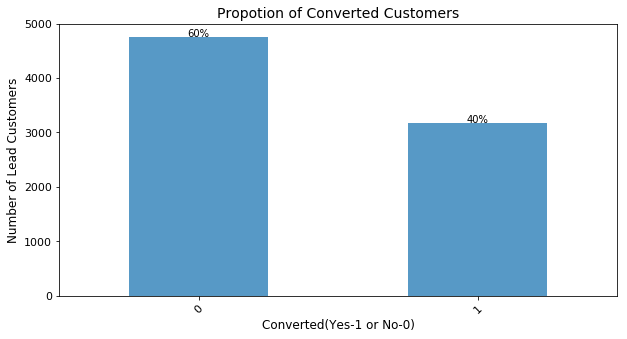

In [91]:
#Percentage of leads and non leads in the dataset
univariate_analysis(df_range,'Converted','Propotion of Converted Customers','Converted(Yes-1 or No-0)')

Inferenence : the number of customers that have converted are 40% which is less than what the client is expecting.

Find the probability of lead conversion to identify the leads

We know that probability of any event is occurence of that event happening/total events

In our case, we can find the probability of a lead Converted and a lead not converted using the below logic

- Probability of lead Conversion = Converted/(converted + not converted)
- Probability of no Lead conversion = not converted/(converted + not converted)

Lets create a function to calculate the conversion percentage and also a fucntion to perform bivariate analysis by using this probability.

In [92]:
df_plot = df_range.copy()

In [93]:
#Replacing the values if Target column from 0 and 1 to Non-Defaulter to Defaulter
df_plot['Converted'] = df_plot['Converted'].replace(0, 'Not-Converted')
df_plot['Converted'] = df_plot['Converted'].replace(1, 'Converted')

In [94]:
df_plot.head()

Lead Number A free copy of Mastering The Interview      Converted  \
0       660737                                     No  Not-Converted   
1       660728                                     No  Not-Converted   
2       660727                                    Yes      Converted   
3       660719                                     No  Not-Converted   
4       660681                                     No      Converted   

  Do Not Email            Last Activity Last Notable Activity  \
0           No  Page Visited on Website              Modified   
1           No             Email Opened          Email Opened   
2           No             Email Opened          Email Opened   
3           No              Unreachable              Modified   
4           No        Converted to Lead              Modified   

               Lead Origin      Lead Quality     Lead Source  \
0                      API  Low in Relevance       Live Chat   
1                      API          Not Sure  Organic Search   
2  Landing Page Submission          Not Sure  Direct Traffic   
3  Landing Page Submission          Not Sure  Direct Traffic   
4  Landing Page Submission          Not Sure          Google   

   Page Views Per Visit         Specialization  \
0                   0.0                 Others   
1                   2.5                 Others   
2                   2.0             Management   
3                   1.0  Media and Advertising   
4                   1.0                 Others   

                                  Tags  Total Time Spent on Website  \
0                               Others                            0   
1                              Ringing                          674   
2  Will revert after reading the email                         1532   
3                              Ringing                          305   
4  Will revert after reading the email                         1428   

   TotalVisits What is your current occupation       Visits    SpentTime  \
0            0                      Unemployed  less than 1  less than 1   
1            5                      Unemployed        1 - 5    601 - 700   
2            2                         Student        1 - 5  1501 - 2000   
3            1                      Unemployed        1 - 5    301 - 400   
4            2                      Unemployed        1 - 5  1001 - 1500   

     ViewRange  
0  less than 1  
1        1 - 5  
2        1 - 5  
3        1 - 5  
4        1 - 5

In [95]:
def conversion_precentage(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['Converted'],margins=True)
    def_tab['All'] = def_tab['Not-Converted'] + def_tab['Converted']
    def_tab['Conversion Probability'] = round((def_tab['Converted']/def_tab['All']),3)
    def_tab['Non-Conversion Probability'] = round((def_tab['Not-Converted']/def_tab['All']),3)
    def_tab = def_tab[0:-1] # removing last row with sum totol 
    return def_tab

In [96]:
def bivariate_analysis_prob(df,col,title,x_label=None,stacked=False):
    
    plot = conversion_precentage(df,col)
    #display(plot)
    #initializing line plot
    plt.figure(figsize=(10,8))
    
    linePlot = plot[['Conversion Probability']]
    linePlot1 = plot[['Non-Conversion Probability']]
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line1 = linePlot1.plot(figsize=(20,8), marker='o',color = 'g',lw=2)
    #line chart for defaulter
    line.set_title(title+' vs Conversion Probability',fontsize=20,weight="bold")
    #line.set_xlabel('Range',fontsize=14)
    line.set_ylabel('Conversion Probability',color = 'r',fontsize=20)
    #line chart for non defaulter
    line1.set_title(title+' vs Non-Conversion Probability',fontsize=20,weight="bold")
    #line1.set_xlabel('Range',fontsize=14)
    line1.set_ylabel('Non-Converion Probability',color = 'r',fontsize=20)
    
    
    #initializing bar plot
    barPlot =  plot.iloc[:,0:2] 
    bar = barPlot.plot(kind='bar',ax = line,rot=45,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of leads',color = 'r',fontsize=20)
   # bar.set_xlabel(x_label,color = 'r',fontsize=20)
    bar1 = barPlot.plot(kind='bar',ax = line1,rot=45,secondary_y=True,stacked=stacked)
    bar1.set_ylabel('Number of leads',color = 'r',fontsize=20)
   # bar1.set_xlabel(x_label,color = 'r',fontsize=20)

    #plt.xlabel(x_label,fontsize=14)
    plt.show()

In [97]:
df_plot.columns

Index(['Lead Number', 'A free copy of Mastering The Interview', 'Converted',
       'Do Not Email', 'Last Activity', 'Last Notable Activity', 'Lead Origin',
       'Lead Quality', 'Lead Source', 'Page Views Per Visit', 'Specialization',
       'Tags', 'Total Time Spent on Website', 'TotalVisits',
       'What is your current occupation', 'Visits', 'SpentTime', 'ViewRange'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

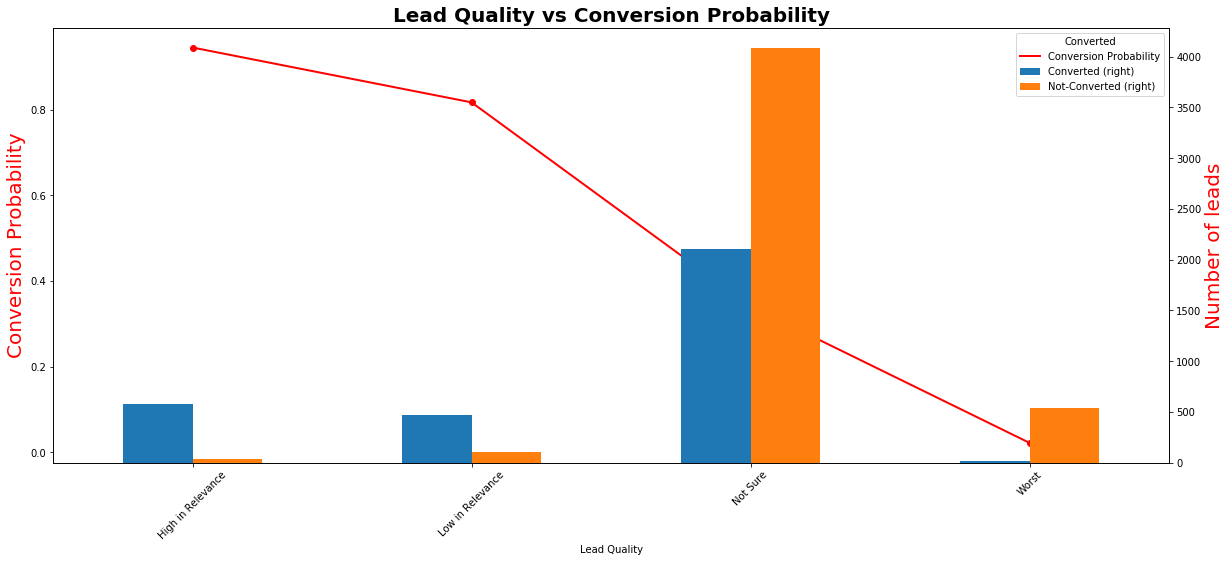

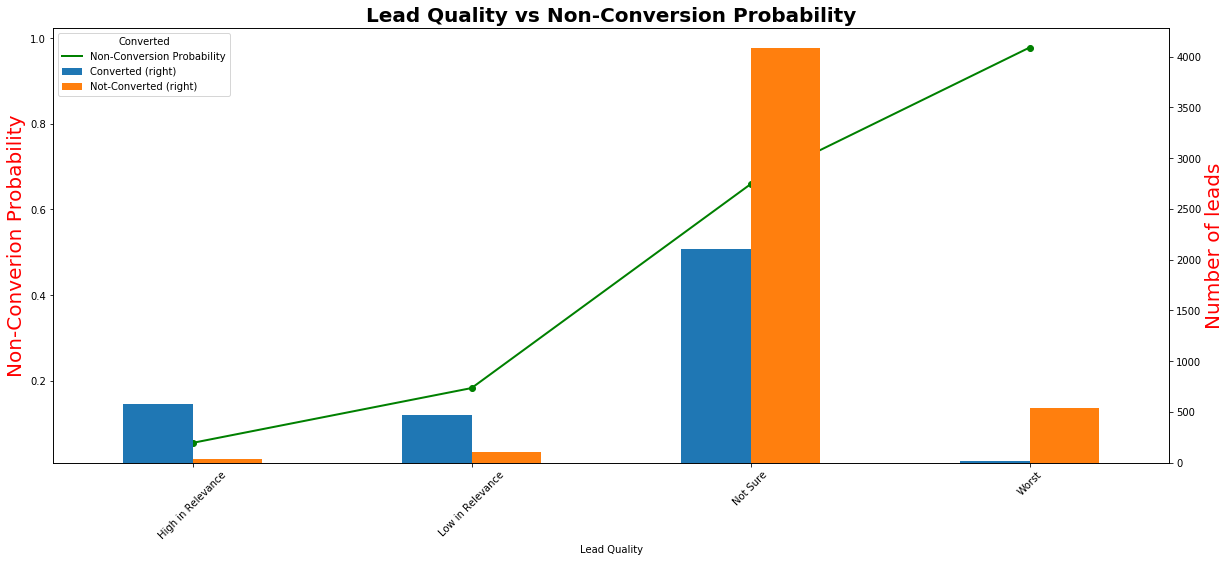

In [98]:
#Lead Quality
bivariate_analysis_prob(df_plot,'Lead Quality','Lead Quality','Lead Quality vs Conversion')

Insights - Customers with High lead quality tend to convert to hot leads and with worst lead quality have a very less priority of becoming a hot customer.

<Figure size 720x576 with 0 Axes>

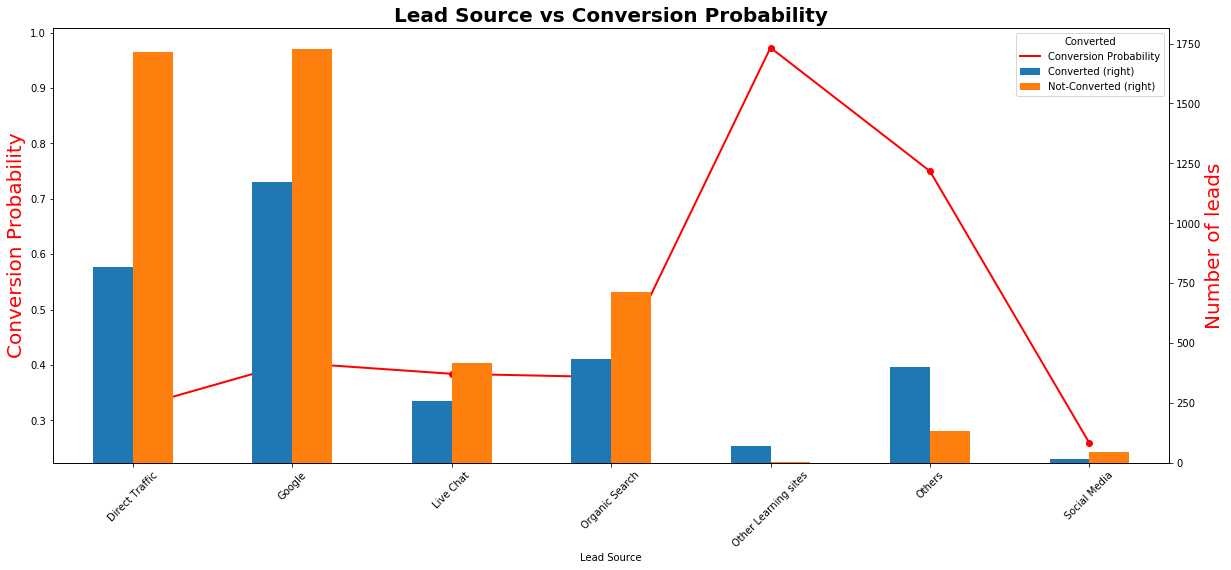

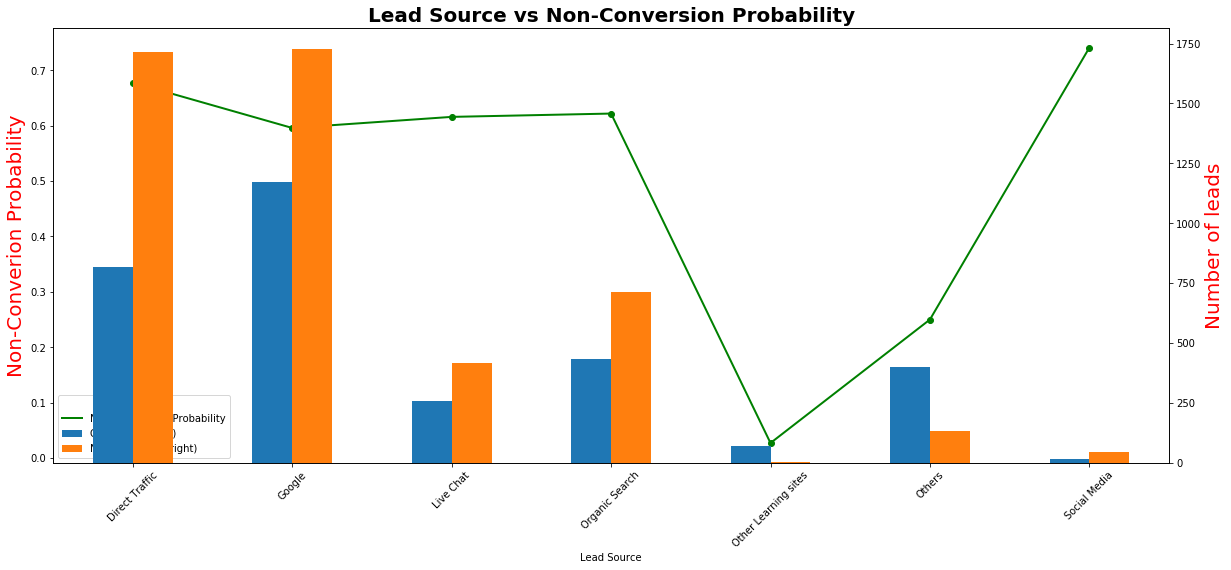

In [99]:
bivariate_analysis_prob(df_plot,'Lead Source','Lead Source','Lead Source vs Conversion')

Inference:
    
- Conversion Rate is high when the lead source is other learning websites.
- Non Conversion Rate is high when the lead source is Social Media

<Figure size 720x576 with 0 Axes>

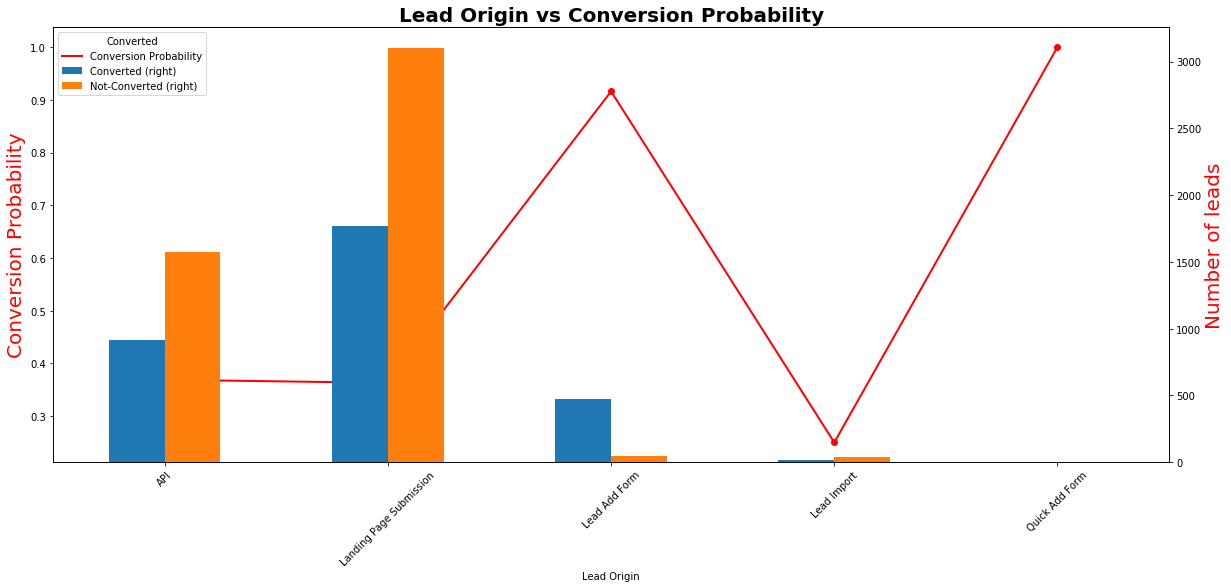

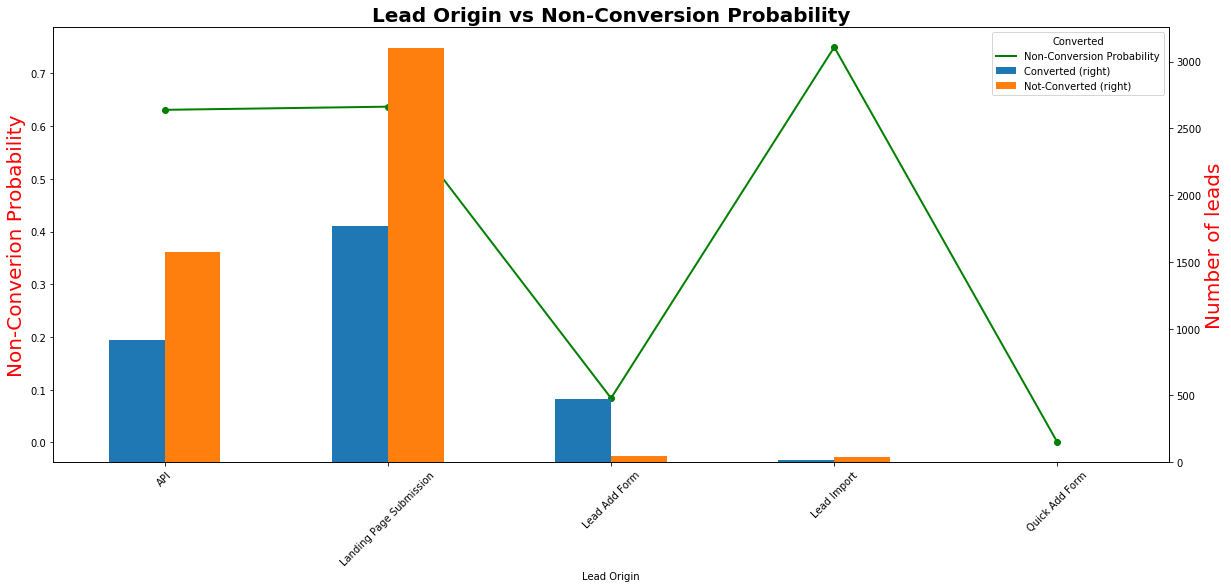

In [100]:
bivariate_analysis_prob(df_plot,'Lead Origin','Lead Origin','Converted')

Inference : 

- Conversion Rate is highest when  the Lead Origin is Lead Add Form or Quick Add Form.
- Non Conversion Rate is high when the Lead Origin is Lead Importor API 

<Figure size 720x576 with 0 Axes>

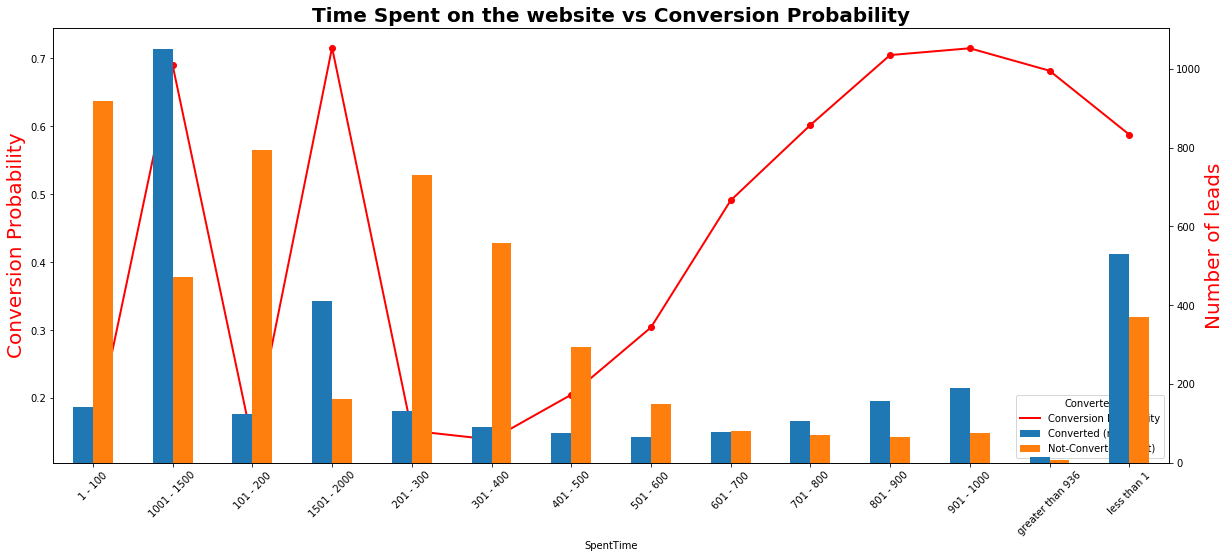

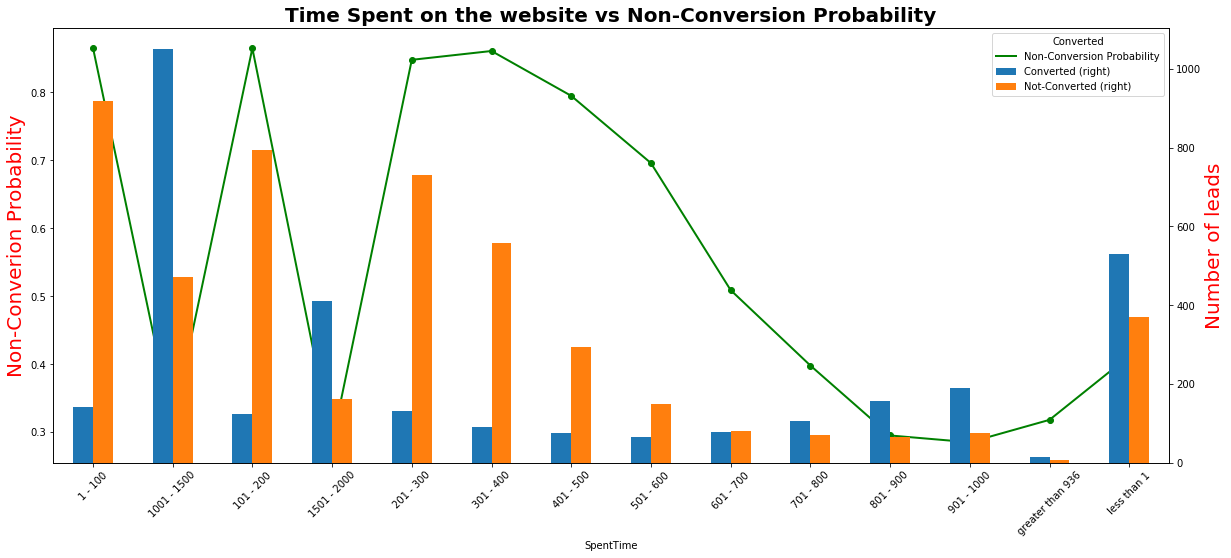

In [101]:
bivariate_analysis_prob(df_plot,'SpentTime','Time Spent on the website','Converted')

Inference : 
    
- As expected, the conversion rate is high when the lead spend more hours on the website (more than 1000)
- Non conversion rare is high when the lead spends less than 500 hrs.

<Figure size 720x576 with 0 Axes>

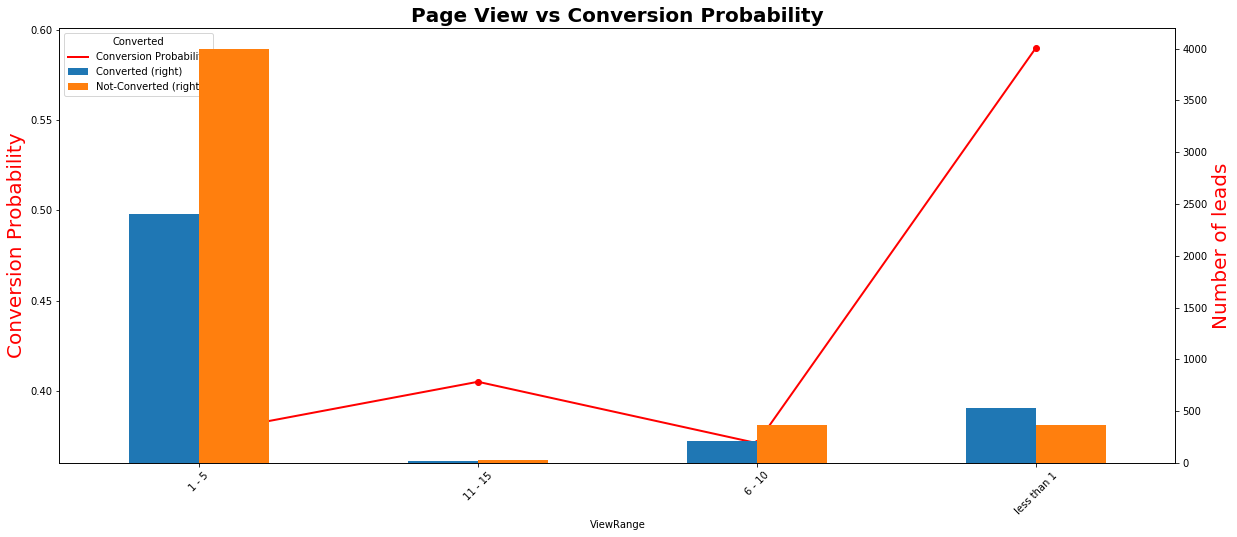

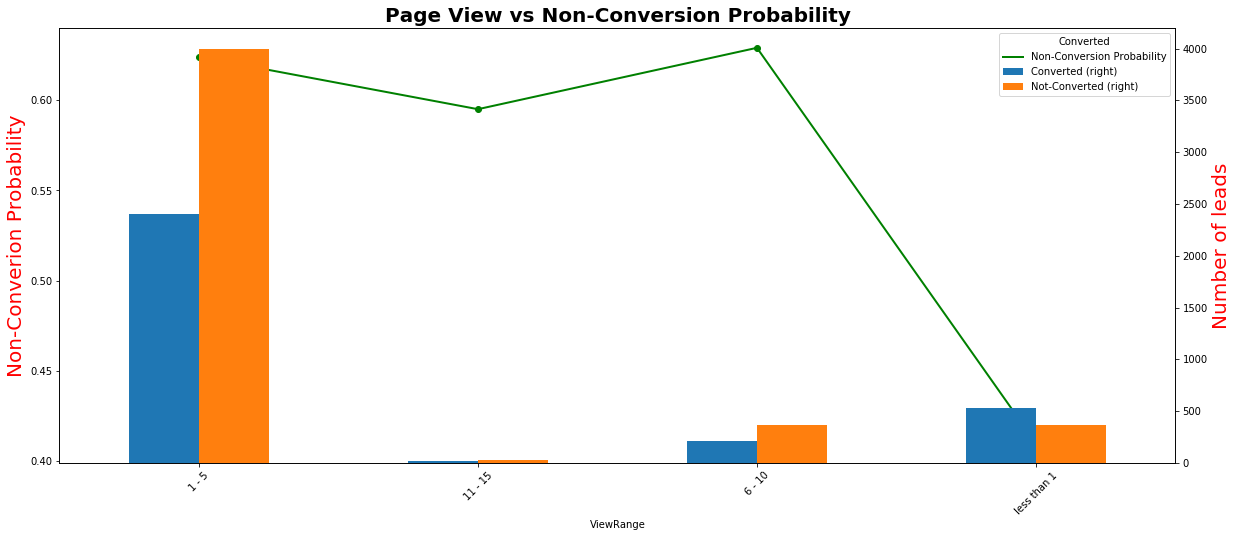

In [102]:
bivariate_analysis_prob(df_plot,'ViewRange','Page View','Converted')

Inference:
    
Conversion Rate is high when avg number of pages viewed is less.

<Figure size 720x576 with 0 Axes>

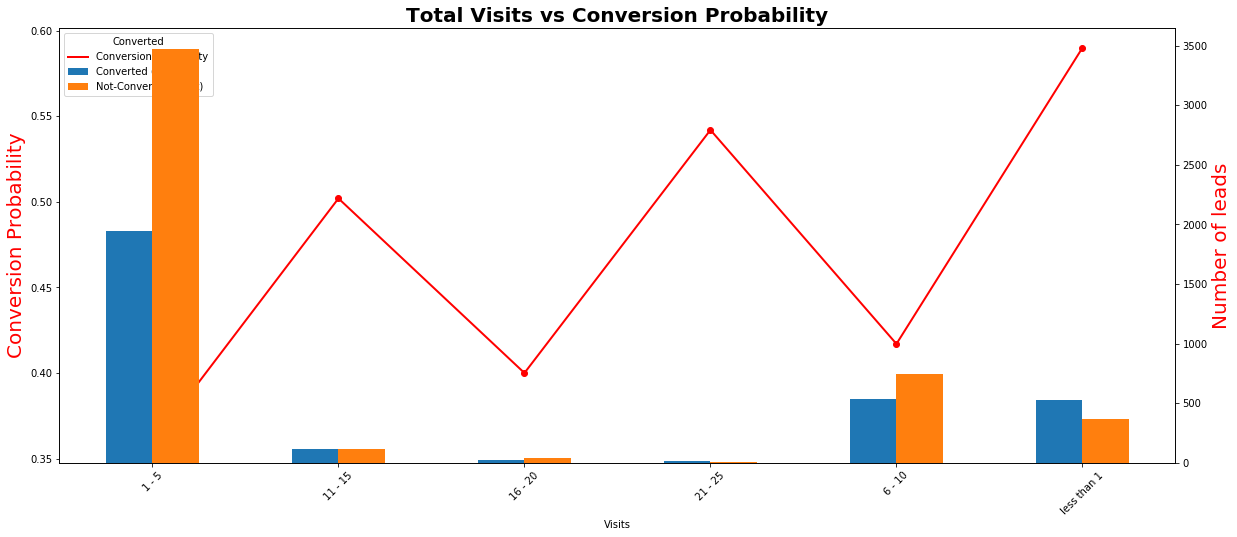

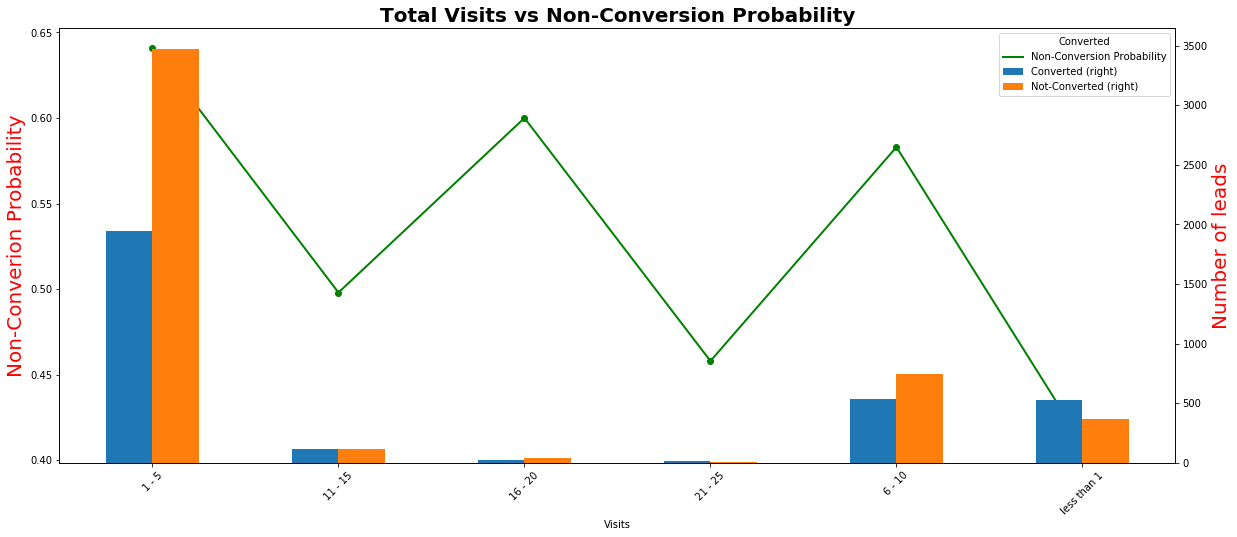

In [103]:
bivariate_analysis_prob(df_plot,'Visits','Total Visits','Converted')

Inference : 
    
Conversion Rate is high when the number of times the lead visits is high.

<Figure size 720x576 with 0 Axes>

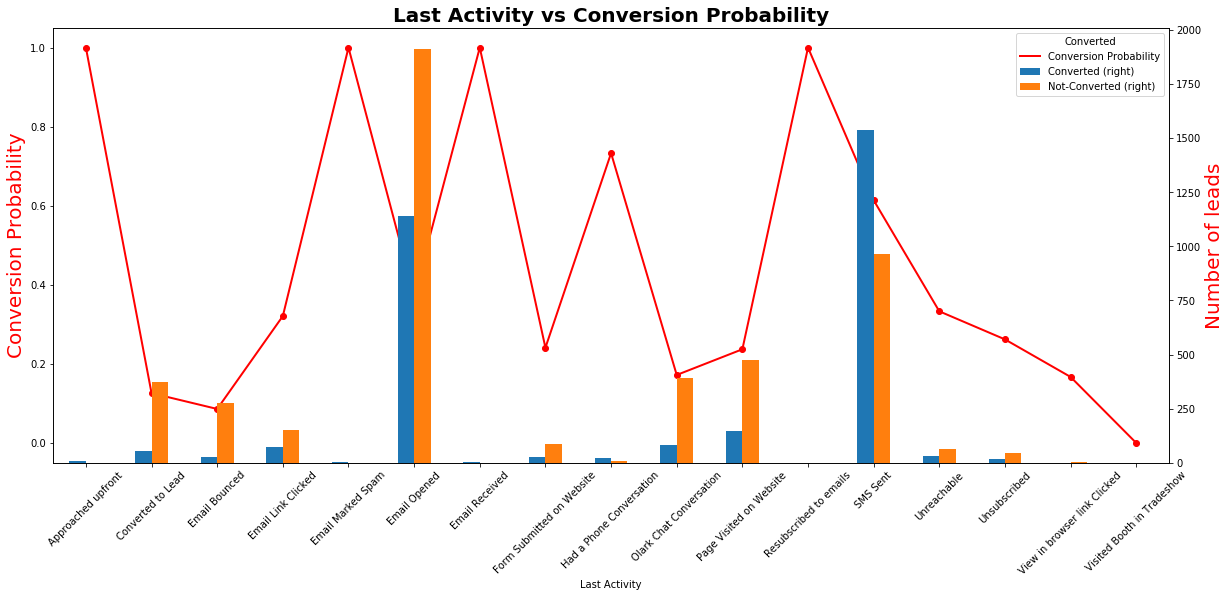

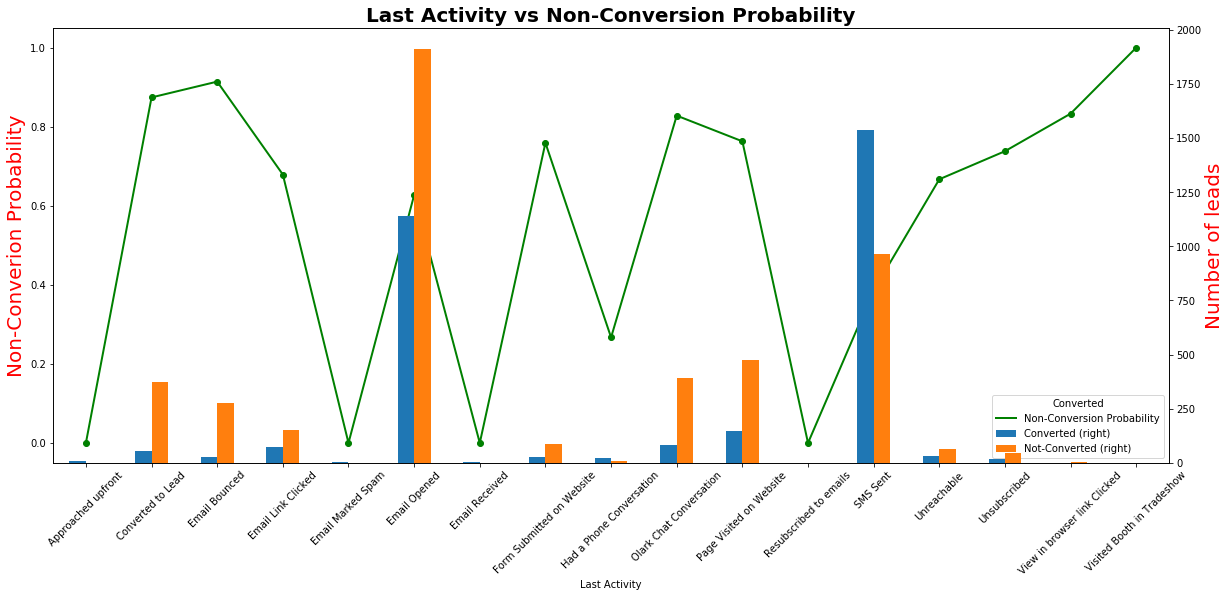

In [104]:
bivariate_analysis_prob(df_plot,'Last Activity','Last Activity','Converted')

Conversion Rate is high when the last activity is if the lead approached upfront, if the email link is clicked etc.
Converion rate is low if the last activity was email bounced etc.


<Figure size 720x576 with 0 Axes>

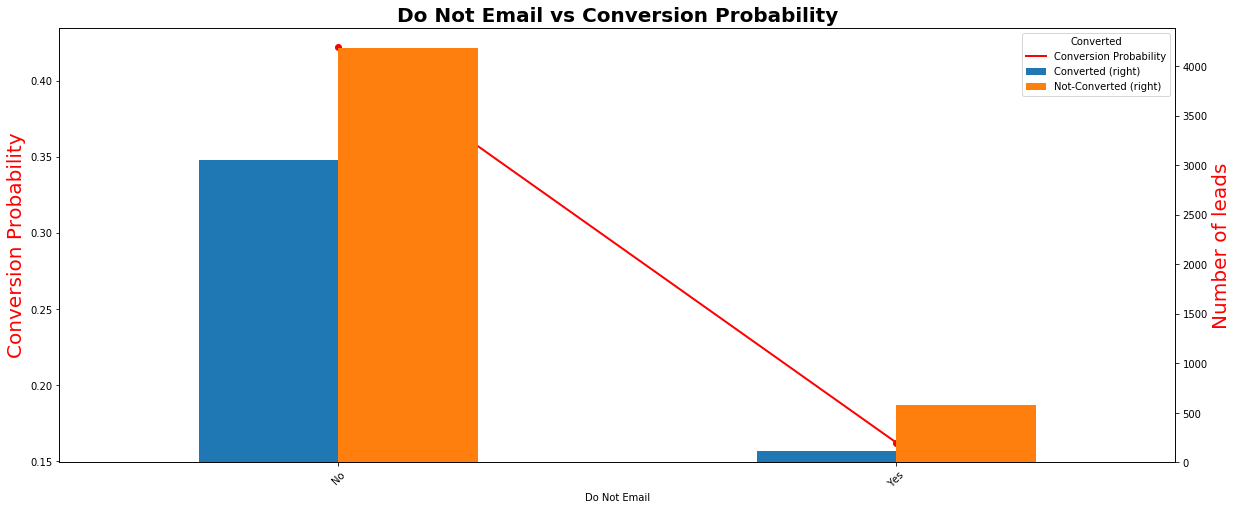

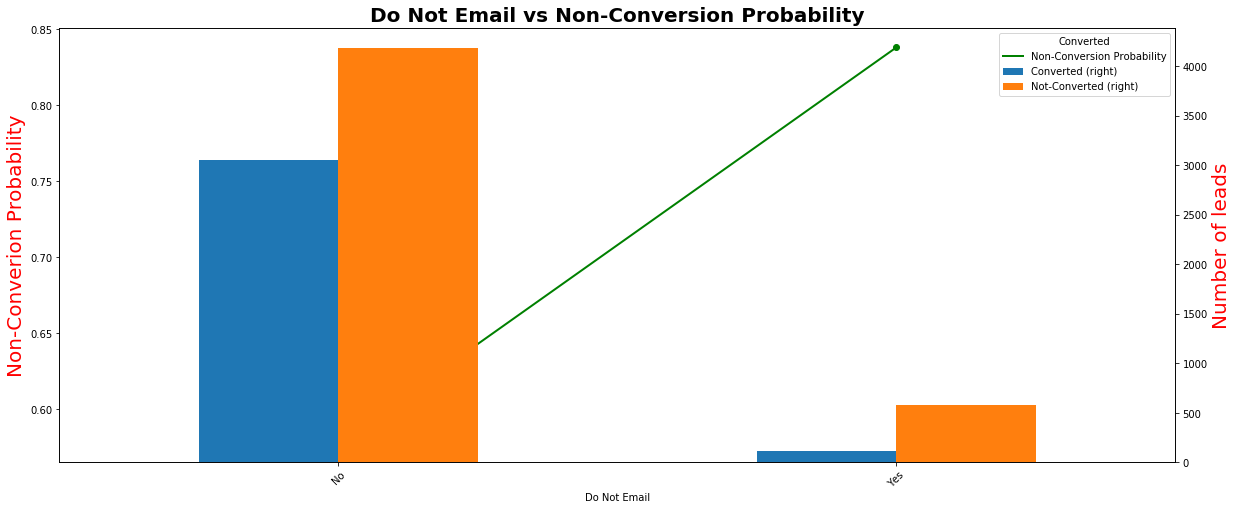

In [105]:
bivariate_analysis_prob(df_plot,'Do Not Email','Do Not Email','Converted')

Assumption :
    
Do not Email , Yes or No inference

Yes : User does not want to receive emails.
No : User received the email

From the above plot, we can infer that users who said yes for emails have high conversion rate

<Figure size 720x576 with 0 Axes>

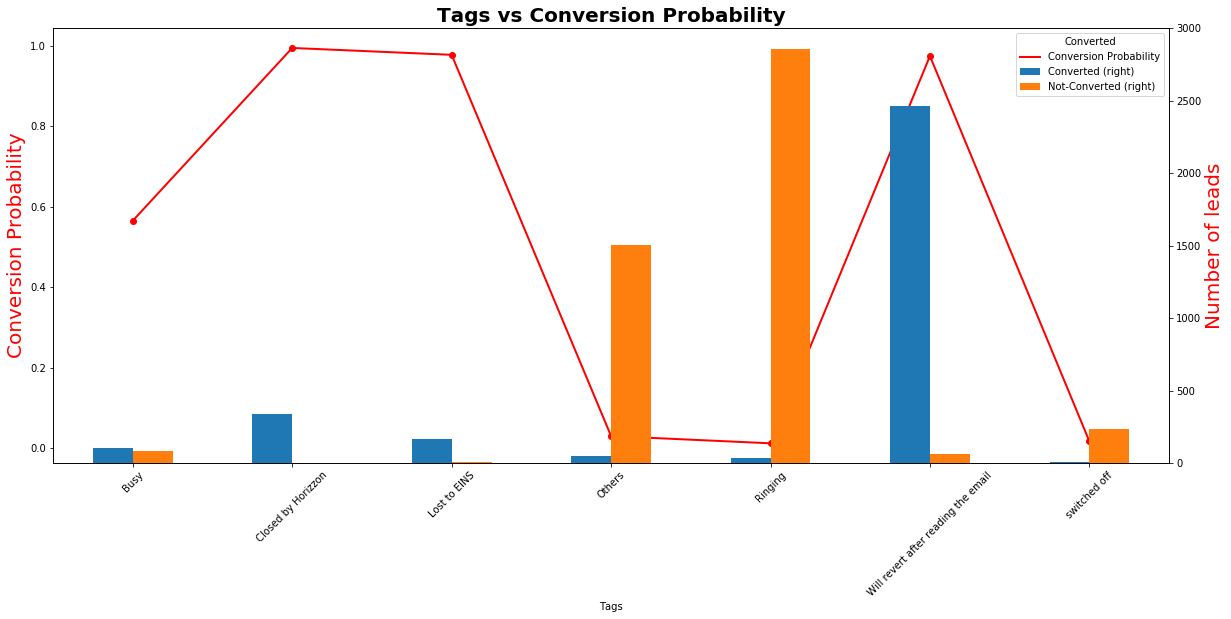

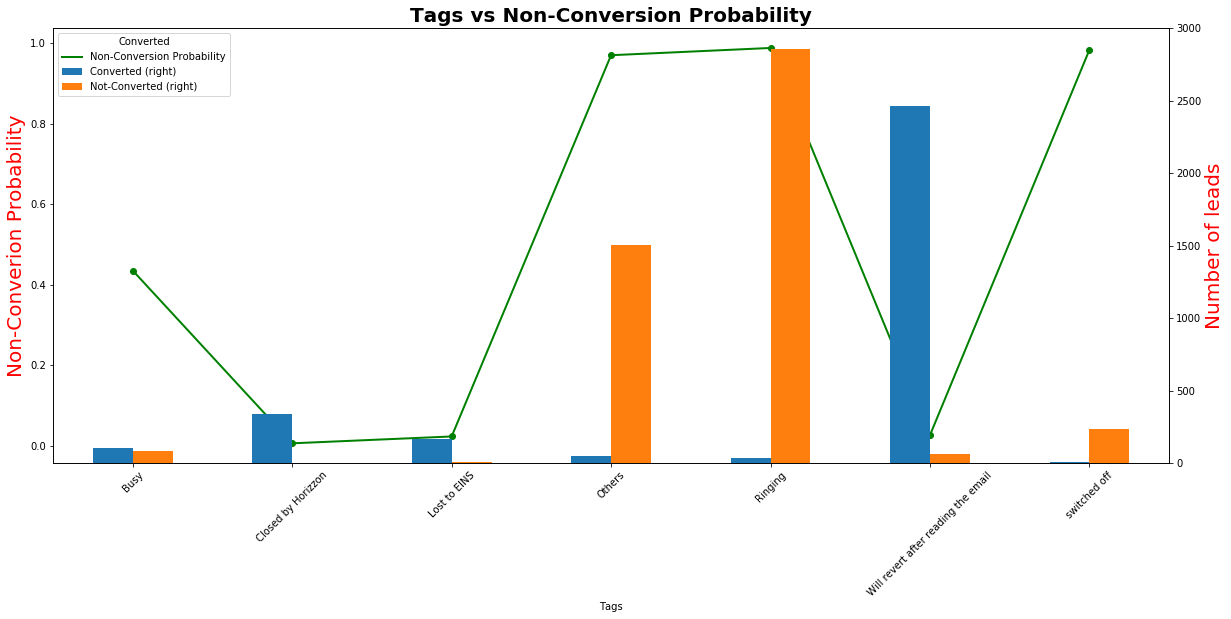

In [106]:
bivariate_analysis_prob(df_plot,'Tags','Tags','Converted')

<Figure size 720x576 with 0 Axes>

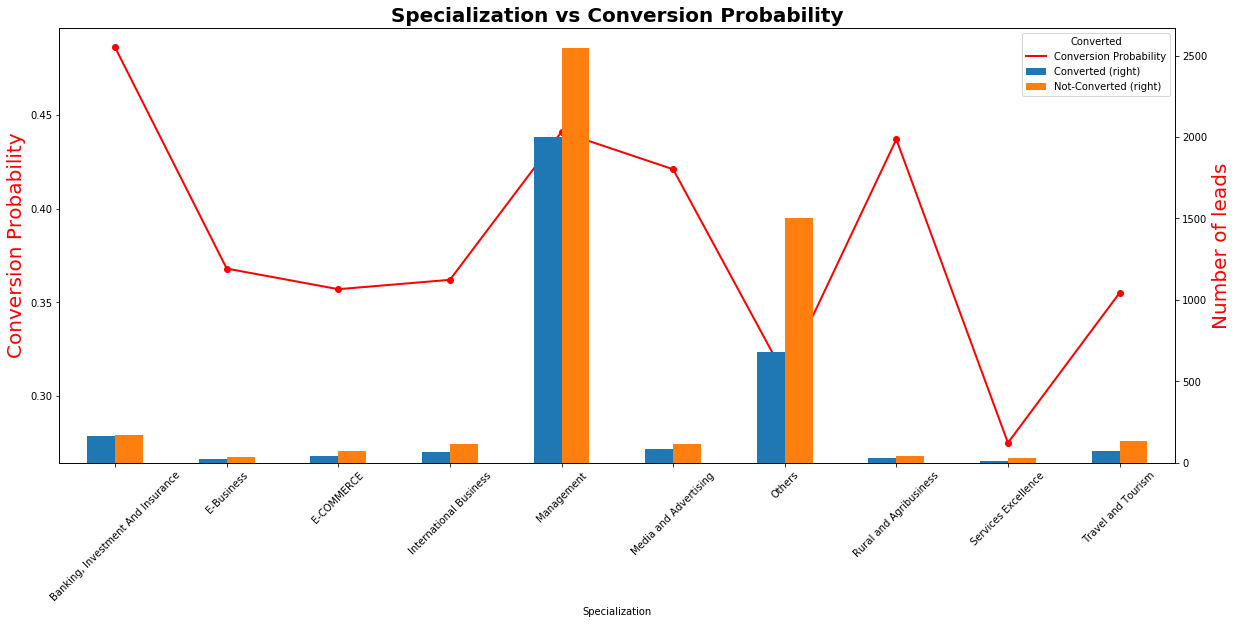

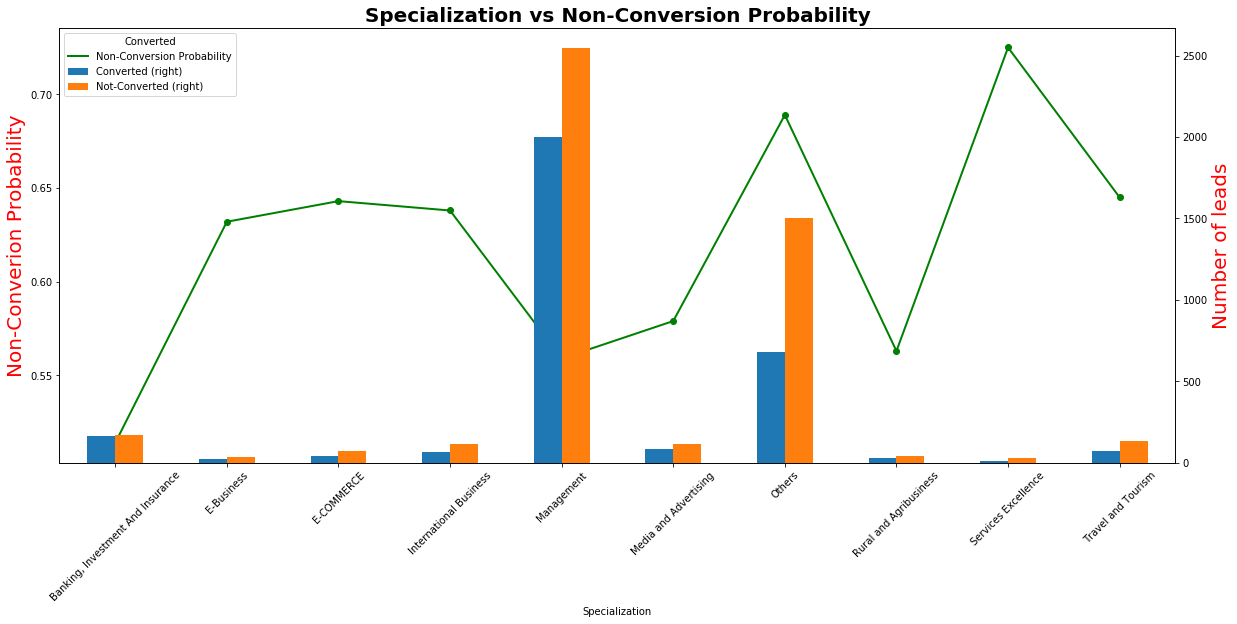

In [107]:
bivariate_analysis_prob(df_plot,'Specialization','Specialization','Converted')

# Data Preparation for Modelling

In [108]:
df_range.columns

Index(['Lead Number', 'A free copy of Mastering The Interview', 'Converted',
       'Do Not Email', 'Last Activity', 'Last Notable Activity', 'Lead Origin',
       'Lead Quality', 'Lead Source', 'Page Views Per Visit', 'Specialization',
       'Tags', 'Total Time Spent on Website', 'TotalVisits',
       'What is your current occupation', 'Visits', 'SpentTime', 'ViewRange'],
      dtype='object')

In [109]:
temp = df_range.copy()

In [110]:
#Dropping the range columns

Lead_DF = temp.drop(['Visits','SpentTime','ViewRange'],axis=1)

In [111]:
Lead_DF.head()

Lead Number A free copy of Mastering The Interview  Converted Do Not Email  \
0       660737                                     No          0           No   
1       660728                                     No          0           No   
2       660727                                    Yes          1           No   
3       660719                                     No          0           No   
4       660681                                     No          1           No   

             Last Activity Last Notable Activity              Lead Origin  \
0  Page Visited on Website              Modified                      API   
1             Email Opened          Email Opened                      API   
2             Email Opened          Email Opened  Landing Page Submission   
3              Unreachable              Modified  Landing Page Submission   
4        Converted to Lead              Modified  Landing Page Submission   

       Lead Quality     Lead Source  Page Views Per Visit  \
0  Low in Relevance       Live Chat                   0.0   
1          Not Sure  Organic Search                   2.5   
2          Not Sure  Direct Traffic                   2.0   
3          Not Sure  Direct Traffic                   1.0   
4          Not Sure          Google                   1.0   

          Specialization                                 Tags  \
0                 Others                               Others   
1                 Others                              Ringing   
2             Management  Will revert after reading the email   
3  Media and Advertising                              Ringing   
4                 Others  Will revert after reading the email   

   Total Time Spent on Website  TotalVisits What is your current occupation  
0                            0            0                      Unemployed  
1                          674            5                      Unemployed  
2                         1532            2                         Student  
3                          305            1                      Unemployed  
4                         1428            2                      Unemployed

In [112]:
#Lets convert Do Not Eamil and 'A free copy of Mastering The Interview' by One Hot Encoder
col_list = ['Do Not Email','A free copy of Mastering The Interview']
for i in col_list:
    Lead_DF[i] = Lead_DF[i].apply(lambda x: pd.Series(x).map({'No':0, 'Yes':1}) if x in ['No','Yes'] else x)

Lead_DF.head()

Lead Number  A free copy of Mastering The Interview  Converted  \
0       660737                                       0          0   
1       660728                                       0          0   
2       660727                                       1          1   
3       660719                                       0          0   
4       660681                                       0          1   

   Do Not Email            Last Activity Last Notable Activity  \
0             0  Page Visited on Website              Modified   
1             0             Email Opened          Email Opened   
2             0             Email Opened          Email Opened   
3             0              Unreachable              Modified   
4             0        Converted to Lead              Modified   

               Lead Origin      Lead Quality     Lead Source  \
0                      API  Low in Relevance       Live Chat   
1                      API          Not Sure  Organic Search   
2  Landing Page Submission          Not Sure  Direct Traffic   
3  Landing Page Submission          Not Sure  Direct Traffic   
4  Landing Page Submission          Not Sure          Google   

   Page Views Per Visit         Specialization  \
0                   0.0                 Others   
1                   2.5                 Others   
2                   2.0             Management   
3                   1.0  Media and Advertising   
4                   1.0                 Others   

                                  Tags  Total Time Spent on Website  \
0                               Others                            0   
1                              Ringing                          674   
2  Will revert after reading the email                         1532   
3                              Ringing                          305   
4  Will revert after reading the email                         1428   

   TotalVisits What is your current occupation  
0            0                      Unemployed  
1            5                      Unemployed  
2            2                         Student  
3            1                      Unemployed  
4            2                      Unemployed

In [113]:
Lead_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7946
Data columns (total 15 columns):
Lead Number                               7921 non-null int64
A free copy of Mastering The Interview    7921 non-null int64
Converted                                 7921 non-null int64
Do Not Email                              7921 non-null int64
Last Activity                             7921 non-null object
Last Notable Activity                     7921 non-null object
Lead Origin                               7921 non-null object
Lead Quality                              7921 non-null object
Lead Source                               7921 non-null object
Page Views Per Visit                      7921 non-null float64
Specialization                            7921 non-null object
Tags                                      7921 non-null object
Total Time Spent on Website               7921 non-null int64
TotalVisits                               7921 non-null int32
What is your cur

In [114]:
leads_df_model = Lead_DF.copy() #Creating a backup

In [115]:
#I see that there are two columns - Last Activity and Last Notable Activity which sounds similar.
#Lets see if there is any relationship between 2 of them.
leads_df_model.groupby(['Last Notable Activity','Last Activity'])['Converted'].value_counts()

Last Notable Activity         Last Activity                 Converted
Approached upfront            Approached upfront            1               1
Email Bounced                 Email Bounced                 0              50
                                                            1               9
Email Link Clicked            Email Link Clicked            0              96
                                                            1              45
Email Marked Spam             Email Marked Spam             1               2
Email Opened                  Email Opened                  0            1557
                                                            1             938
Email Received                Email Received                1               1
Form Submitted on Website     Form Submitted on Website     0               1
Had a Phone Conversation      Had a Phone Conversation      1              13
                                                            0           

In [116]:
#I see that last Notable activity is able to explain as Last activity will not be able to able to explain reappearance of customer on website as 'modified'
leads_df_model.drop('Last Activity', axis=1, inplace=True)
leads_df_model.head()

Lead Number  A free copy of Mastering The Interview  Converted  \
0       660737                                       0          0   
1       660728                                       0          0   
2       660727                                       1          1   
3       660719                                       0          0   
4       660681                                       0          1   

   Do Not Email Last Notable Activity              Lead Origin  \
0             0              Modified                      API   
1             0          Email Opened                      API   
2             0          Email Opened  Landing Page Submission   
3             0              Modified  Landing Page Submission   
4             0              Modified  Landing Page Submission   

       Lead Quality     Lead Source  Page Views Per Visit  \
0  Low in Relevance       Live Chat                   0.0   
1          Not Sure  Organic Search                   2.5   
2          Not Sure  Direct Traffic                   2.0   
3          Not Sure  Direct Traffic                   1.0   
4          Not Sure          Google                   1.0   

          Specialization                                 Tags  \
0                 Others                               Others   
1                 Others                              Ringing   
2             Management  Will revert after reading the email   
3  Media and Advertising                              Ringing   
4                 Others  Will revert after reading the email   

   Total Time Spent on Website  TotalVisits What is your current occupation  
0                            0            0                      Unemployed  
1                          674            5                      Unemployed  
2                         1532            2                         Student  
3                          305            1                      Unemployed  
4                         1428            2                      Unemployed

In [117]:
print('Last Notable Activity: Counts\n',leads_df_model['Last Notable Activity'].value_counts())


Last Notable Activity: Counts
 Modified                        2836
Email Opened                    2495
SMS Sent                        1880
Page Visited on Website          305
Email Link Clicked               141
Olark Chat Conversation          105
Email Bounced                     59
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64


In [118]:
#Lets convert Low frequency values as 'Others'
low_freq_val = ['Unreachable','Had a Phone Conversation', 'Email Marked Spam', 'View in browser link Clicked', 'Resubscribed to emails','Form Submitted on Website','Approached upfront','Email Received']
leads_df_model['Last Notable Activity'] = leads_df_model['Last Notable Activity'].apply(lambda x:'Others' if x in low_freq_val else x)
leads_df_model['Last Notable Activity'].value_counts()

Modified                   2836
Email Opened               2495
SMS Sent                   1880
Page Visited on Website     305
Email Link Clicked          141
Olark Chat Conversation     105
Email Bounced                59
Others                       53
Unsubscribed                 47
Name: Last Notable Activity, dtype: int64

In [119]:
#creating a copy of the df to scale the df
leads_df_toscale = leads_df_model.copy()

In [120]:
leads_df_toscale.head(2)

Lead Number  A free copy of Mastering The Interview  Converted  \
0       660737                                       0          0   
1       660728                                       0          0   

   Do Not Email Last Notable Activity Lead Origin      Lead Quality  \
0             0              Modified         API  Low in Relevance   
1             0          Email Opened         API          Not Sure   

      Lead Source  Page Views Per Visit Specialization     Tags  \
0       Live Chat                   0.0         Others   Others   
1  Organic Search                   2.5         Others  Ringing   

   Total Time Spent on Website  TotalVisits What is your current occupation  
0                            0            0                      Unemployed  
1                          674            5                      Unemployed

In [121]:
leads_df_toscale.shape

(7921, 14)

Dummy Variable Creation

In [122]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
lead_orig = pd.get_dummies(leads_df_toscale['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,lead_orig],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
lead_src = pd.get_dummies(leads_df_toscale['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,lead_src],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
sp = pd.get_dummies(leads_df_toscale['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,sp],axis=1)

# Creating a dummy variable for the variable 'Tags' and dropping the first one.
tg = pd.get_dummies(leads_df_toscale['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,tg],axis=1)

# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.
lead_q = pd.get_dummies(leads_df_toscale['Lead Quality'],prefix='Lead Quality',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,lead_q],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
last_notAct = pd.get_dummies(leads_df_toscale['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,last_notAct],axis=1)


# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
occ = pd.get_dummies(leads_df_toscale['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
#Adding the results to the master dataframe
leads_df_toscale = pd.concat([leads_df_toscale,occ],axis=1)

In [123]:
# We have created dummies for the below variables, so we can drop them
leads_df_toscale = leads_df_toscale.drop(['Lead Origin','Lead Source','Specialization','Tags','Lead Quality', 'Last Notable Activity','What is your current occupation'], 1)

In [124]:
#Checking to see if we have any categorical columns left
leads_df_toscale.dtypes

Lead Number                                               int64
A free copy of Mastering The Interview                    int64
Converted                                                 int64
Do Not Email                                              int64
Page Views Per Visit                                    float64
Total Time Spent on Website                               int64
TotalVisits                                               int32
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Origin_Lead Import                                   uint8
Lead Origin_Quick Add Form                                uint8
Lead Source_Google                                        uint8
Lead Source_Live Chat                                     uint8
Lead Source_Organic Search                                uint8
Lead Source_Other Learning sites                          uint8
Lead Source_Others                      

In [125]:
leads_df_toscale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 0 to 7946
Data columns (total 48 columns):
Lead Number                                             7921 non-null int64
A free copy of Mastering The Interview                  7921 non-null int64
Converted                                               7921 non-null int64
Do Not Email                                            7921 non-null int64
Page Views Per Visit                                    7921 non-null float64
Total Time Spent on Website                             7921 non-null int64
TotalVisits                                             7921 non-null int32
Lead Origin_Landing Page Submission                     7921 non-null uint8
Lead Origin_Lead Add Form                               7921 non-null uint8
Lead Origin_Lead Import                                 7921 non-null uint8
Lead Origin_Quick Add Form                              7921 non-null uint8
Lead Source_Google                                     

In [126]:
# Normalising continuous features
leads_df_toscaleNorm = leads_df_toscale[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [127]:
normalized_df=(leads_df_toscaleNorm-leads_df_toscaleNorm.mean())/leads_df_toscaleNorm.std()
leads_df_toscale = leads_df_toscale.drop(['TotalVisits','Total Time Spent on Website','Page Views Per Visit'], 1)
leads_df_toscale = pd.concat([leads_df_toscale,normalized_df],axis=1)
leads_df_toscale.head()

Lead Number  A free copy of Mastering The Interview  Converted  \
0       660737                                       0          0   
1       660728                                       0          0   
2       660727                                       1          1   
3       660719                                       0          0   
4       660681                                       0          1   

   Do Not Email  Lead Origin_Landing Page Submission  \
0             0                                    0   
1             0                                    0   
2             0                                    1   
3             0                                    1   
4             0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Live Chat  \
0                           0                   0                      1   
1                           0                   0                      0   
2                           0                   0                      0   
3                           0                   0                      0   
4                           0                   1                      0   

   Lead Source_Organic Search  Lead Source_Other Learning sites  \
0                           0                                 0   
1                           1                                 0   
2                           0                                 0   
3                           0                                 0   
4                           0                                 0   

   Lead Source_Others  Lead Source_Social Media  Specialization_E-Business  \
0                   0                         0                          0   
1                   0                         0                          0   
2                   0                         0                          0   
3                   0                         0                          0   
4                   0                         0                          0   

   Specialization_E-COMMERCE  Specialization_International Business  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0   
3                          0                                      0   
4                          0                                      0   

   Specialization_Management  Specialization_Media and Advertising  \
0                          0                                     0   
1                          0                                     0   
2                          1                                     0   
3                          0                                     1   
4                          0                                     0   

   Specialization_Others  Specialization_Rural and Agribusiness  \
0                      1                                      0   
1                      1                                      0   
2                      0                                      0   
3                      0                                      0   
4                      1                                      0   

   Specialization_Services Excellence  Specialization_Travel and Tourism  \
0                                   0                                  0   
1                                   0                                  0   
2                                   0                                  0   
3                       

In [128]:
lead_df_scaled_final = leads_df_toscale.copy()
lead_df_scaled_final.shape

(7921, 48)

### Checking the Converision Rate

In [129]:
converted = (sum(lead_df_scaled_final['Converted'])/len(lead_df_scaled_final['Converted'].index))*100
converted

39.98232546395657

## Test Train Split

In [130]:
test_train_lead = lead_df_scaled_final.copy()
test_train_lead.head(2)

Lead Number  A free copy of Mastering The Interview  Converted  \
0       660737                                       0          0   
1       660728                                       0          0   

   Do Not Email  Lead Origin_Landing Page Submission  \
0             0                                    0   
1             0                                    0   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Live Chat  \
0                           0                   0                      1   
1                           0                   0                      0   

   Lead Source_Organic Search  Lead Source_Other Learning sites  \
0                           0                                 0   
1                           1                                 0   

   Lead Source_Others  Lead Source_Social Media  Specialization_E-Business  \
0                   0                         0                          0   
1                   0                         0                          0   

   Specialization_E-COMMERCE  Specialization_International Business  \
0                          0                                      0   
1                          0                                      0   

   Specialization_Management  Specialization_Media and Advertising  \
0                          0                                     0   
1                          0                                     0   

   Specialization_Others  Specialization_Rural and Agribusiness  \
0                      1                                      0   
1                      1                                      0   

   Specialization_Services Excellence  Specialization_Travel and Tourism  \
0                                   0                                  0   
1                                   0                                  0   

   Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Others  Tags_Ringing  \
0                        0                  0            1             0   
1                        0                  0            0             1   

   Tags_Will revert after reading the email  Tags_switched off  \
0                                         0                  0   
1                                         0                  0   

   Lead Quality_Low in Relevance  Lead Quality_Not Sure  Lead Quality_Worst  \
0                              1                      0                   0   
1                              0                      1                   0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  \
0                               0                                   0   
1                               0                                   0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   

   What is your current occupation_Other  \
0                                      0   
1                              

In [131]:
lead_split_df = test_train_lead.copy()

In [132]:
lead_split_df.head(2)

Lead Number  A free copy of Mastering The Interview  Converted  \
0       660737                                       0          0   
1       660728                                       0          0   

   Do Not Email  Lead Origin_Landing Page Submission  \
0             0                                    0   
1             0                                    0   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Google  Lead Source_Live Chat  \
0                           0                   0                      1   
1                           0                   0                      0   

   Lead Source_Organic Search  Lead Source_Other Learning sites  \
0                           0                                 0   
1                           1                                 0   

   Lead Source_Others  Lead Source_Social Media  Specialization_E-Business  \
0                   0                         0                          0   
1                   0                         0                          0   

   Specialization_E-COMMERCE  Specialization_International Business  \
0                          0                                      0   
1                          0                                      0   

   Specialization_Management  Specialization_Media and Advertising  \
0                          0                                     0   
1                          0                                     0   

   Specialization_Others  Specialization_Rural and Agribusiness  \
0                      1                                      0   
1                      1                                      0   

   Specialization_Services Excellence  Specialization_Travel and Tourism  \
0                                   0                                  0   
1                                   0                                  0   

   Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Others  Tags_Ringing  \
0                        0                  0            1             0   
1                        0                  0            0             1   

   Tags_Will revert after reading the email  Tags_switched off  \
0                                         0                  0   
1                                         0                  0   

   Lead Quality_Low in Relevance  Lead Quality_Not Sure  Lead Quality_Worst  \
0                              1                      0                   0   
1                              0                      1                   0   

   Last Notable Activity_Email Link Clicked  \
0                                         0   
1                                         0   

   Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
0                                   0                               1   
1                                   1                               0   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   

   Last Notable Activity_Others  \
0                             0   
1                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unsubscribed  \
0                               0                                   0   
1                               0                                   0   

   What is your current occupation_Housewife  \
0                                          0   
1                                          0   

   What is your current occupation_Other  \
0                                      0   
1                              

## Correlation Matrix

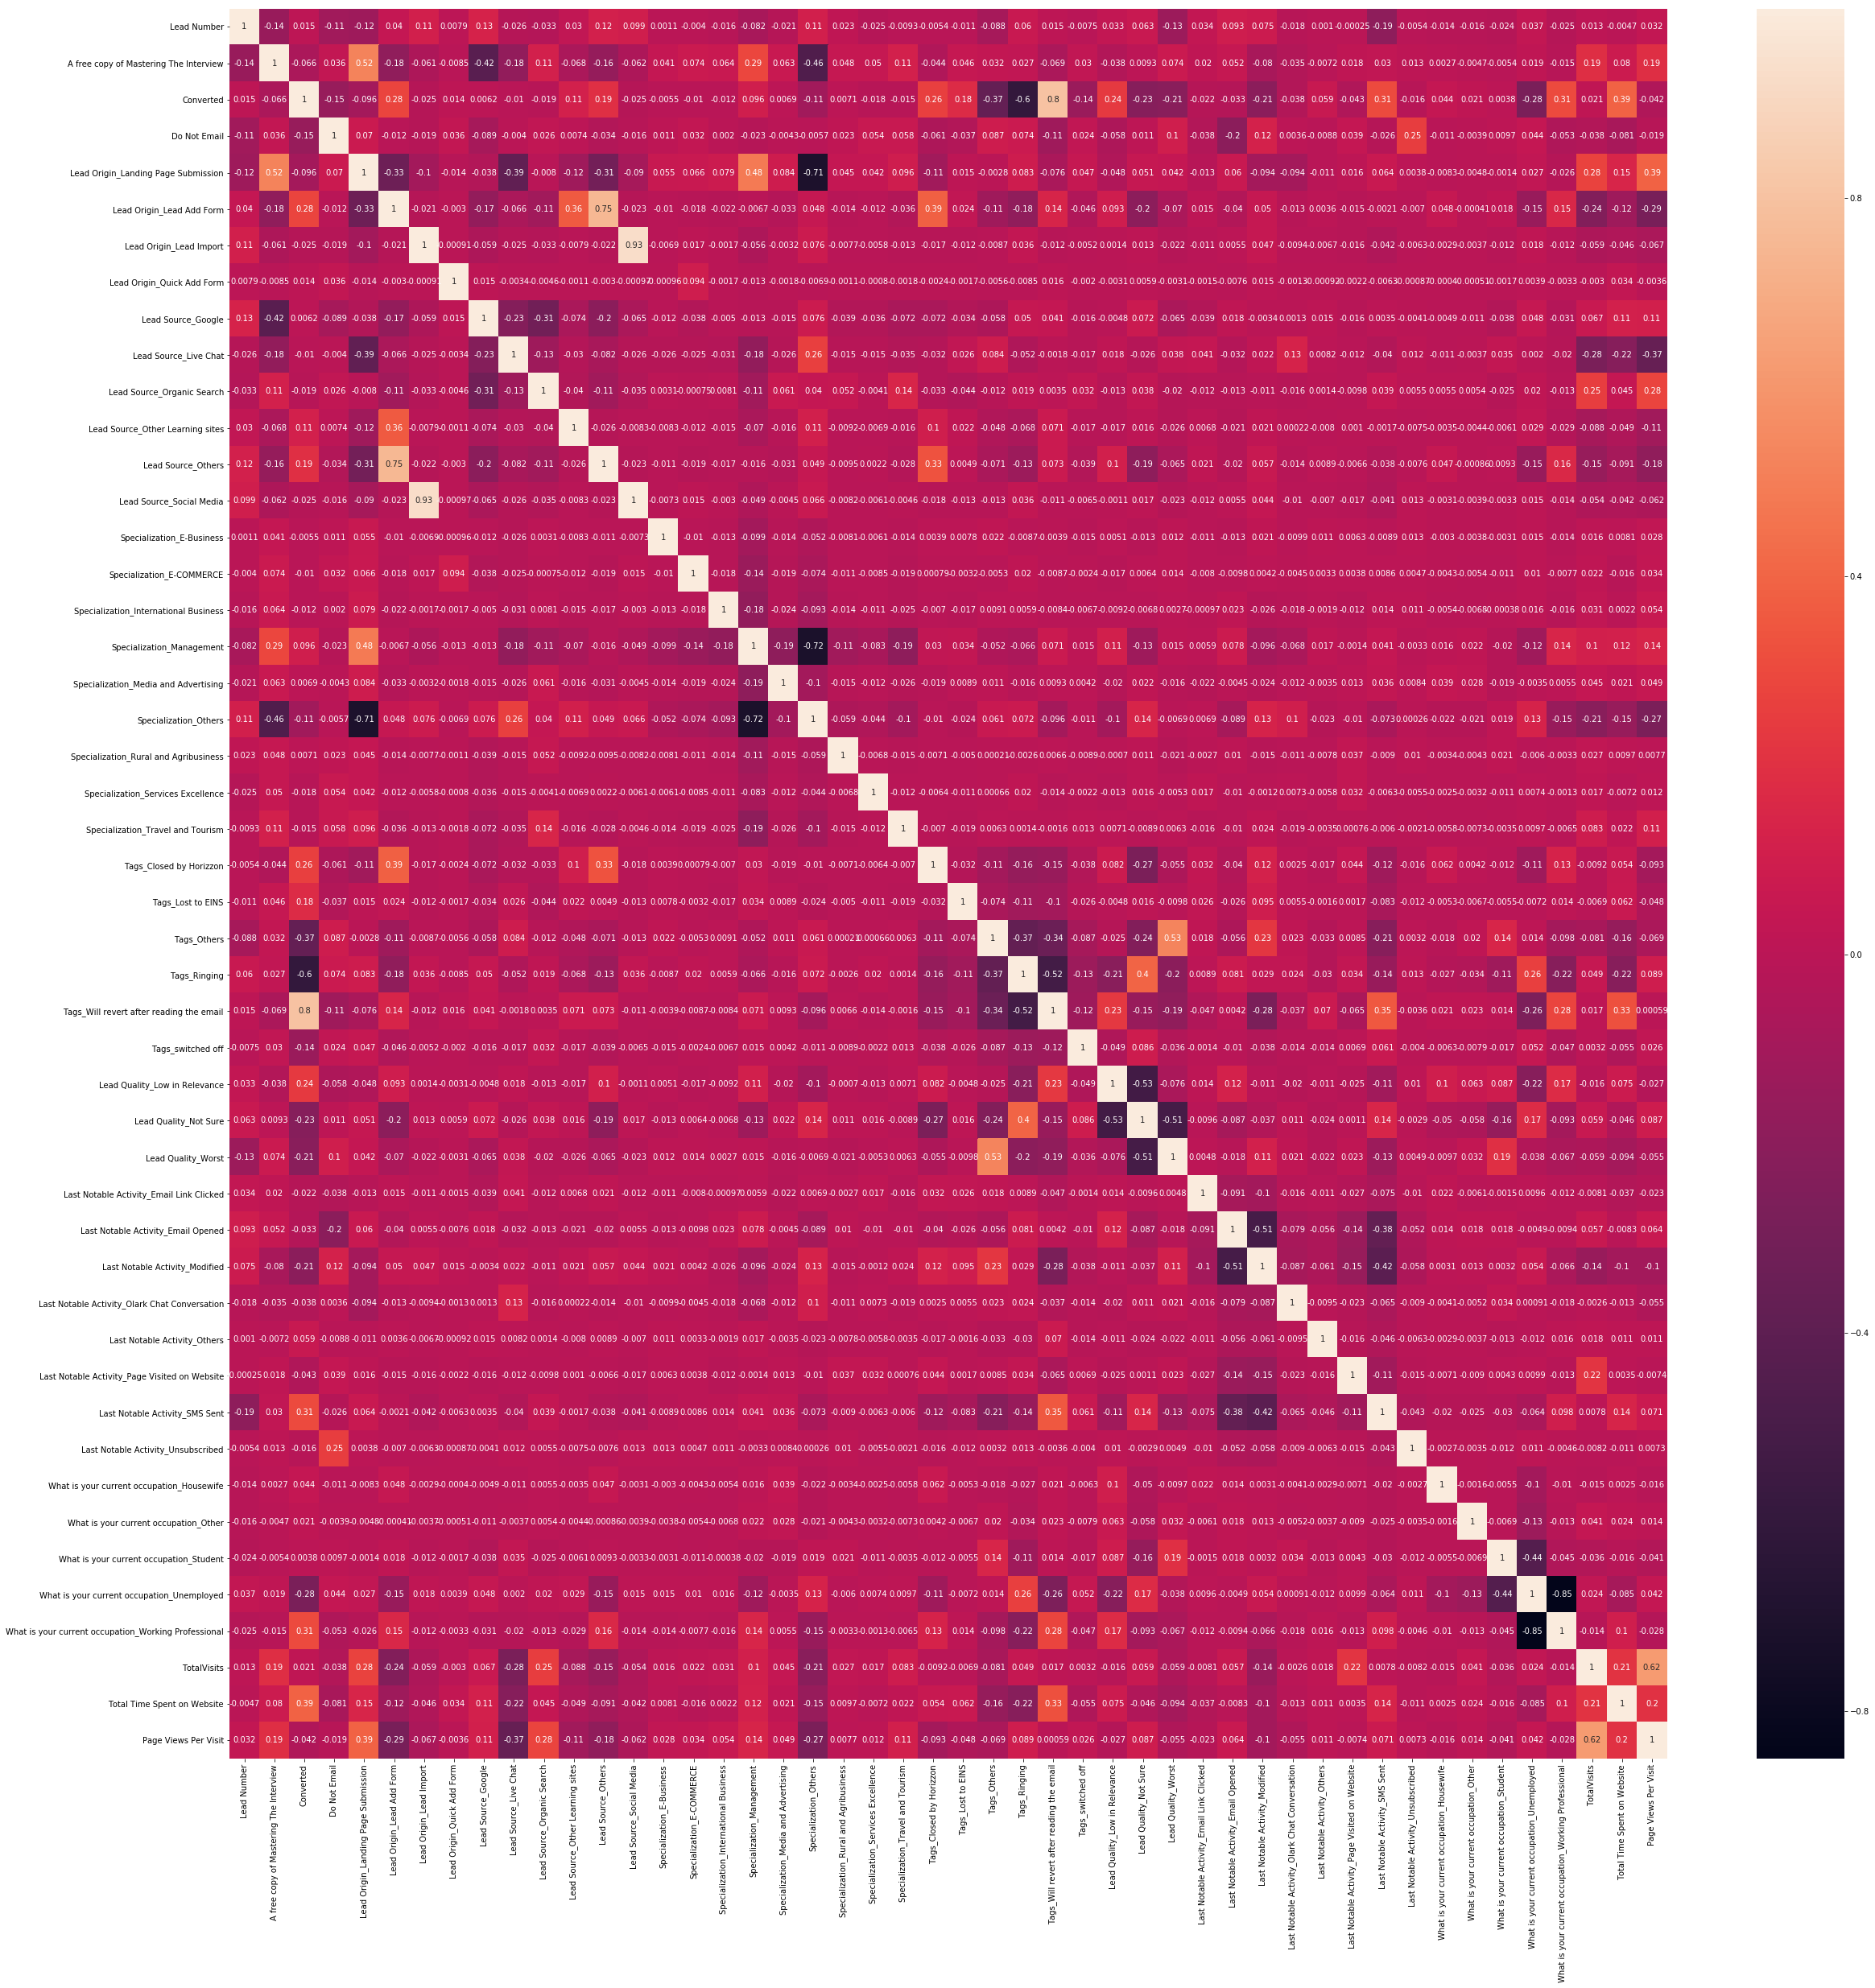

In [133]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,40))        # Size of the figure
sns.heatmap(lead_split_df.corr(),annot = True)

In [134]:
corr1 = lead_split_df.corr()

In [135]:
# Select upper triangle of correlation matrix
upper1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation
correlatedCols_approved50 = [column for column in upper1.columns if any(upper1[column] > 0.50)]
correlatedCols_approved60 = [column for column in upper1.columns if any(upper1[column] > 0.60)]
correlatedCols_approved75 = [column for column in upper1.columns if any(upper1[column] > 0.75)]
correlatedCols_approved90 = [column for column in upper1.columns if any(upper1[column] > 0.95)]

print("greater than 50% correlation",correlatedCols_approved50)
print("greater than 60% correlation",correlatedCols_approved60)
print("greater than 75% correlation",correlatedCols_approved75)
print("greater than 95% correlation",correlatedCols_approved90)

greater than 50% correlation ['Lead Origin_Landing Page Submission', 'Lead Source_Others', 'Lead Source_Social Media', 'Tags_Will revert after reading the email', 'Lead Quality_Worst', 'Page Views Per Visit']
greater than 60% correlation ['Lead Source_Others', 'Lead Source_Social Media', 'Tags_Will revert after reading the email', 'Page Views Per Visit']
greater than 75% correlation ['Lead Source_Others', 'Lead Source_Social Media', 'Tags_Will revert after reading the email']
greater than 95% correlation []


We can drop few columns as the correlation  between them is high and any one can be used for analysis.
Like Lead Quality_Worst is in high correlation with Tags_Others etc
#I see that Page Views Per Visit has a high correlation with Total Visits, But I am not dropping any columns as both the columns are crucial to business.

In [136]:
lead_split_df = lead_split_df.drop(['Lead Source_Others', 'Lead Origin_Lead Import', 'Tags_Others','Lead Origin_Landing Page Submission'],1)

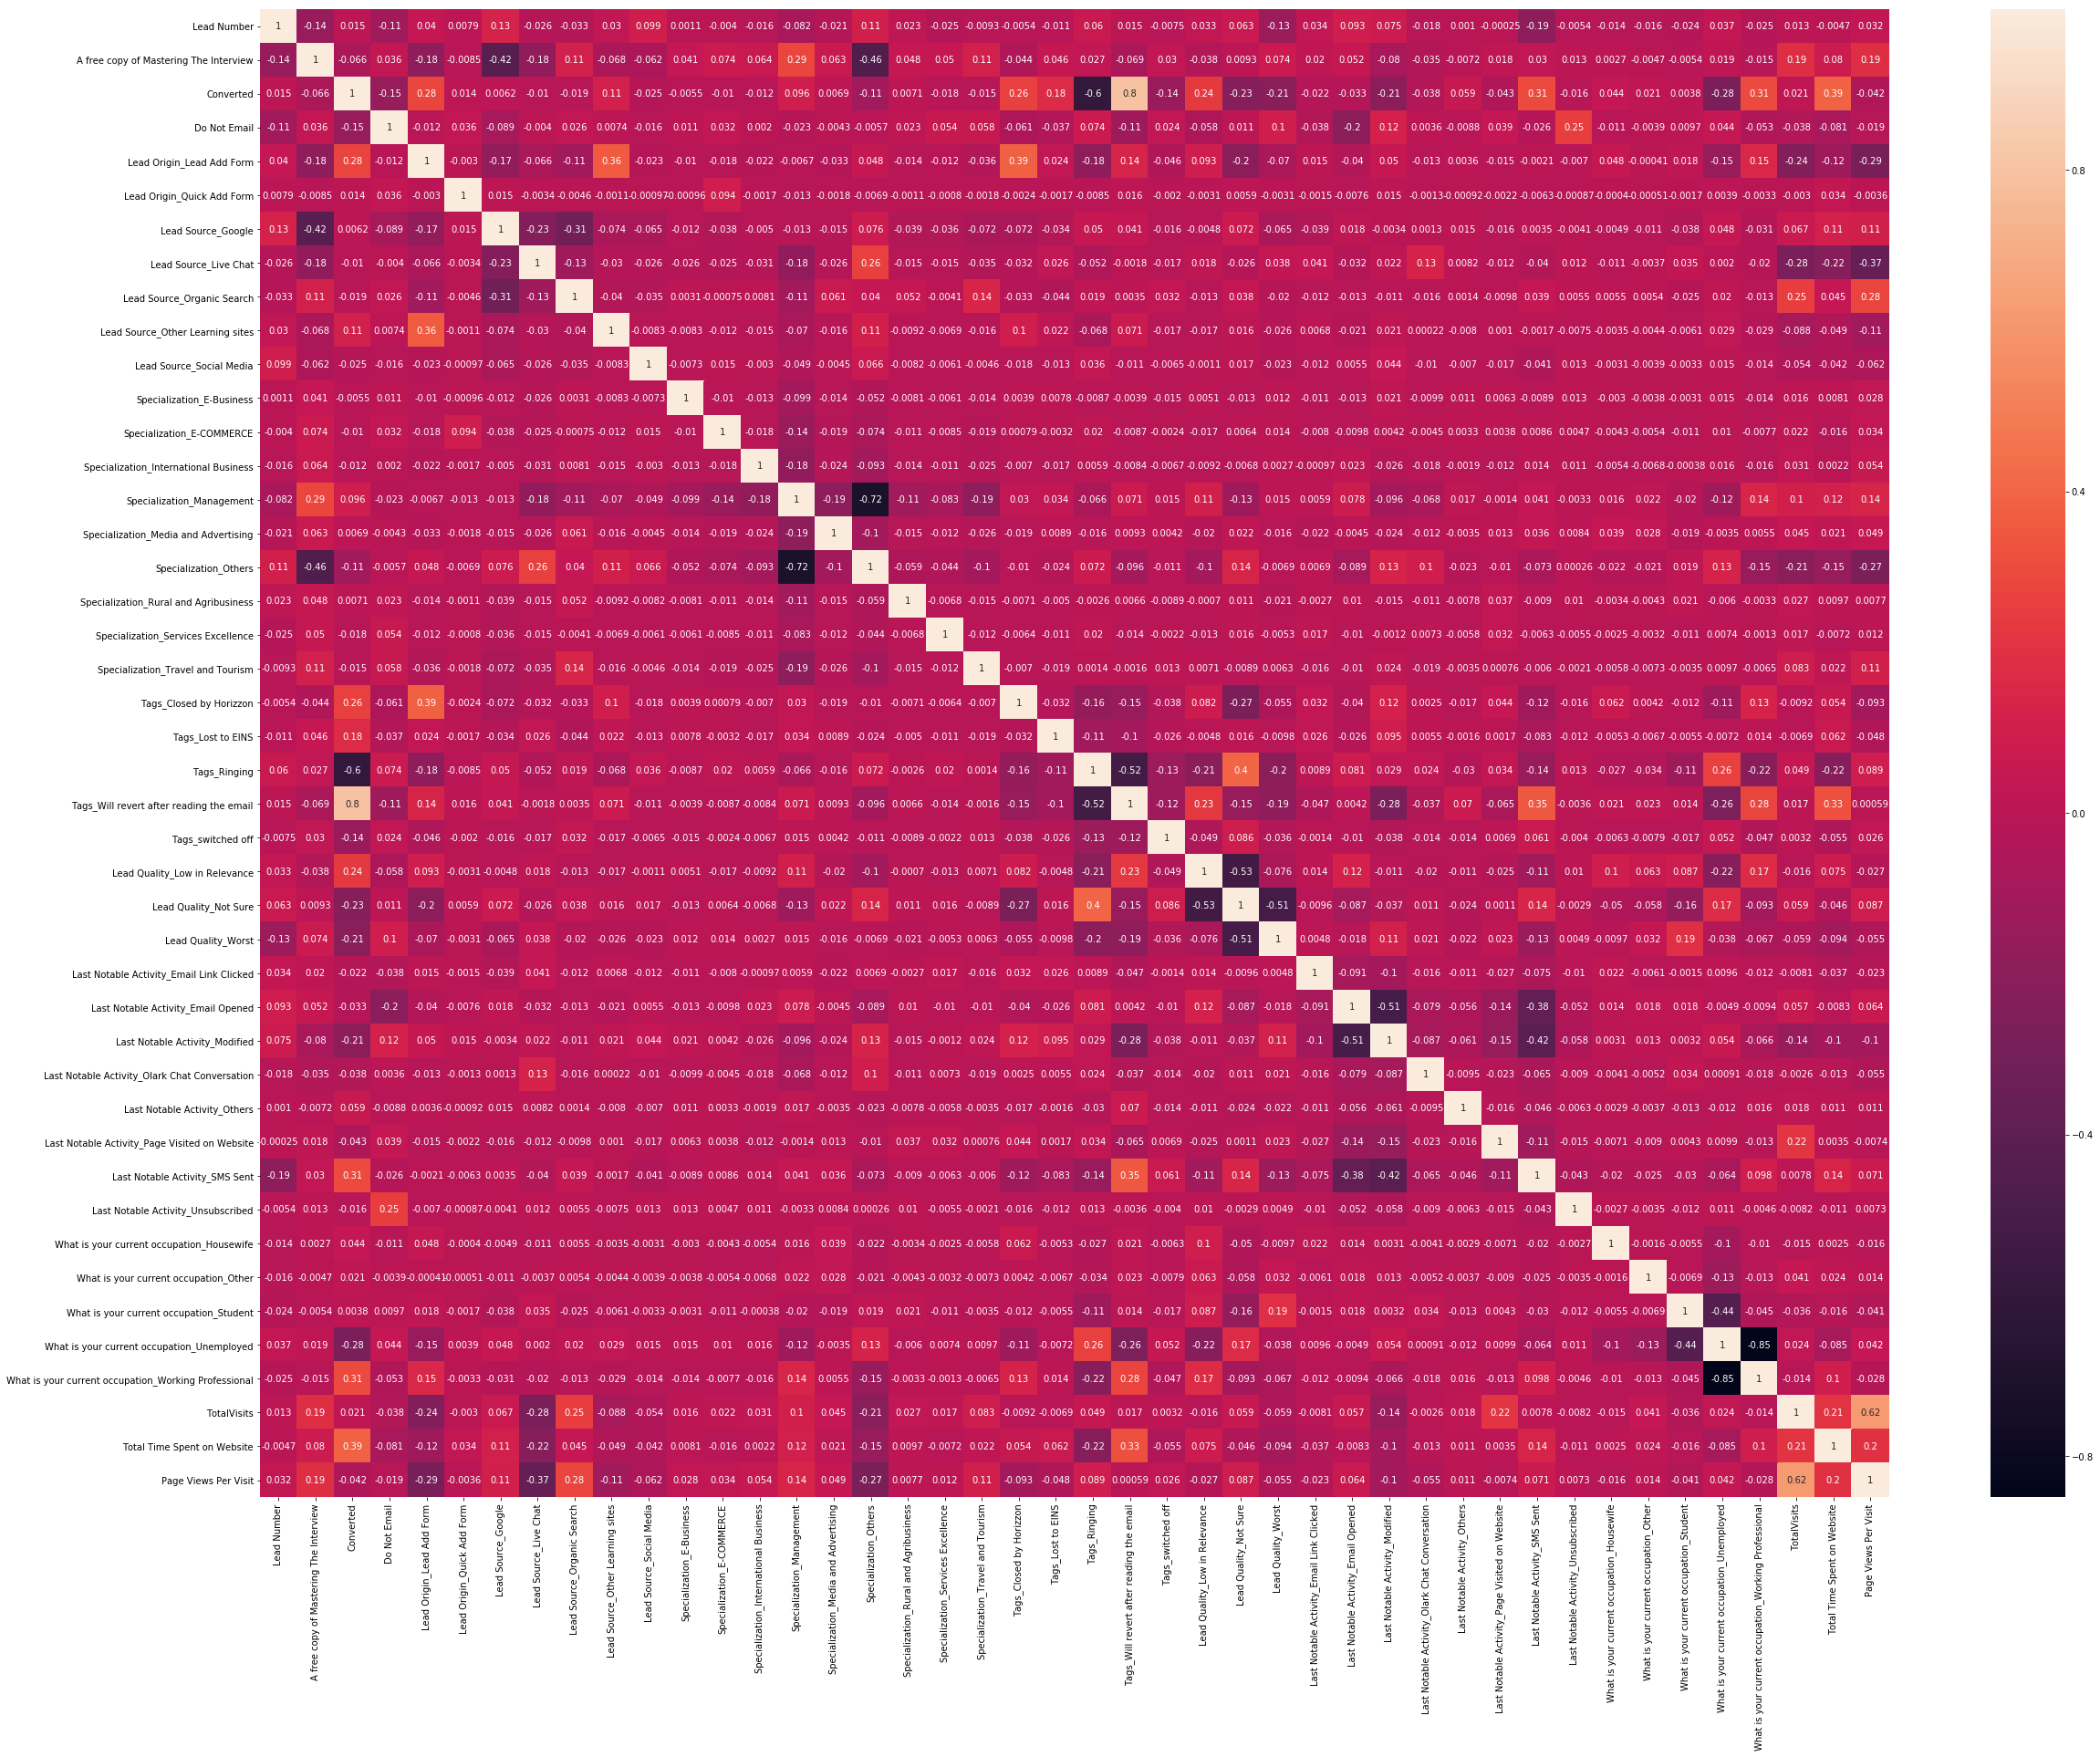

In [137]:
plt.figure(figsize = (40,30))
sns.heatmap(lead_split_df.corr(),annot = True)

In [138]:
corr1train = lead_split_df.corr()

In [139]:
df_model = lead_split_df.copy()

In [140]:
df_model.shape


(7921, 44)

In [141]:
# Putting feature variable to X
X = df_model.drop(['Converted','Lead Number'],axis=1)

# Putting response variable to y
y = df_model['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print('Train Dataset Size: ', X_train.shape)
print('Test Dataset Size: ', X_test.shape)

Train Dataset Size:  (5544, 42)
Test Dataset Size:  (2377, 42)


# First Logistic Regression Model with all Features

In [143]:
#First Model
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5544
Model:                            GLM   Df Residuals:                     5501
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -507.33
Date:                Sun, 06 Oct 2019   Deviance:                       1014.7
Time:                        14:03:24   Pearson chi2:                 9.28e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9363      1.715     -1.129      0.259      -5.298       1.426
A free copy of Mastering The Interview                  -0.0336      0.256     -0.131      0.895      -0.534       0.467
Do Not Email                                            -1.0375      0.418     -2.484      0.013      -1.856      -0.219
Lead Origin_Lead Add Form                                0.2865      0.448      0.639      0.523      -0.592       1.165
Lead Origin_Quick Add Form                              17.9721   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Google                                       0.4951      0.268      1.845      0.065      -0.031       1.021
Lead Source_Live Chat                                    0.9325      0.384      2.429      0.015       0.180       1.685
Lead Source_Organic Search                               0.4095      0.297      1.377      0.169      -0.173       0.992
Lead Source_Other Learning sites                         4.0023      3.295      1.215      0.224      -2.455      10.460
Lead Source_Social Media                                 0.5921      1.045      0.566      0.571      -1.457       2.641
Specialization_E-Business                               -1.2648      1.064     -1.188      0.235      -3.351       0.821
Specialization_E-COMMERCE                               -0.4703      0.861     -0.546      0.585      -2.158       1.218
Specialization_International Business                   -0.7175      0.666     -1.077      0.281      -2.023       0.588
Specialization_Management                               -0.7247      0.441     -1.642      0.101      -1.590       0.140
Specialization_Media and Advertising                    -1.3538      0.660     -2.051      0.040      -2.647      -0.060
Specialization_Others                                   -0.9383      0.487     -1.926      0.054      -1.893       0.016
Specialization_Rural and Agribusiness                   -0.3924      0.950     -0.413      0.680      -2.255       1.470
Specialization_Services Excellence                       0.5619      1.120      0.502      0.616      -1.633       2.757
Specialization_Travel and Tourism                       -1.0079      0.746     -1.351      0.177      -2.470       0.454
Tags_Closed by Horizzon                                  8.1911      1.089      7.521      0.000       6.057      10.326
Tags_Lost to EINS                                        7.1749      0.687     10.450      0.000       5.829       8.521
Tags_Ringing                                            -3.1408      0.284    -11.057      0.000      -3.697      -2.584
Tags_Will revert after reading the email                 5.4273      0.235     23.120      0.000       4.967       5.887
Tags_switched of

## Feature Selection using RFE

In [144]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg,10)             # running RFE with 15 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False False False False False  True False False False False
 False False False False False False  True  True  True  True  True False
 False  True False False False False  True False  True False False False
 False False False False  True False]
[21  5  4 31 15  6 16  1 14 10 28 18 19 13 17 20 32  9  1  1  1  1  1  8
  7  1 29 11  3  2  1 22  1 25 12 33 26 27 30 23  1 24]


In [145]:
#columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Lead Source_Other Learning sites', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent', 'Total Time Spent on Website'],
      dtype='object')

In [146]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [147]:
#Building the model with the RFE selected variables
X_train_sm= sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5544
Model:                            GLM   Df Residuals:                     5533
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -532.60
Date:                Sun, 06 Oct 2019   Deviance:                       1065.2
Time:                        14:03:25   Pearson chi2:                 7.96e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7716      0.150    -18.445      0.000      -3.066      -2.477
Lead Source_Other Learning sites             3.4335      2.607      1.317      0.188      -1.675       8.542
Tags_Closed by Horizzon                      8.4876      1.029      8.250      0.000       6.471      10.504
Tags_Lost to EINS                            7.0635      0.676     10.456      0.000       5.740       8.387
Tags_Ringing                                -3.0108      0.274    -10.995      0.000      -3.548      -2.474
Tags_Will revert after reading the email     5.6204      0.211     26.664      0.000       5.207       6.034
Tags_switched off                           -3.3062      0.744     -4.446      0.000      -4.764      -1.849
Lead Quality_Worst                          -3.0089      0.632     -4.763      0.000      -4.247      -1.771
Last Notable Activity_Others                 2.9729      1.121      2.651      0.008       0.775       5.171
Last Notable Activity_SMS Sent               2.6283      0.213     12.320      0.000       2.210       3.046
Total Time Spent on Website                  0.8649      0.085     10.204      0.000       0.699       1.031
============================================================================================================
"""

In [148]:
#Drop Lead Source_Other Learning sites.
col = col.drop('Lead Source_Other Learning sites',1)

In [149]:
X_train_sm= sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5544
Model:                            GLM   Df Residuals:                     5534
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -534.63
Date:                Sun, 06 Oct 2019   Deviance:                       1069.3
Time:                        14:03:25   Pearson chi2:                 8.08e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7676      0.150    -18.449      0.000      -3.062      -2.474
Tags_Closed by Horizzon                      8.5425      1.028      8.314      0.000       6.529      10.557
Tags_Lost to EINS                            7.0845      0.674     10.507      0.000       5.763       8.406
Tags_Ringing                                -3.0043      0.274    -10.984      0.000      -3.540      -2.468
Tags_Will revert after reading the email     5.6563      0.211     26.835      0.000       5.243       6.069
Tags_switched off                           -3.3044      0.743     -4.445      0.000      -4.761      -1.847
Lead Quality_Worst                          -3.0216      0.634     -4.762      0.000      -4.265      -1.778
Last Notable Activity_Others                 2.9585      1.123      2.634      0.008       0.757       5.160
Last Notable Activity_SMS Sent               2.6247      0.213     12.318      0.000       2.207       3.042
Total Time Spent on Website                  0.8573      0.085     10.116      0.000       0.691       1.023
============================================================================================================
"""

In [150]:
#Drop Last Notable Activity_Others
col=col.drop('Last Notable Activity_Others', 1)
X_train_sm= sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5544
Model:                            GLM   Df Residuals:                     5535
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -537.77
Date:                Sun, 06 Oct 2019   Deviance:                       1075.5
Time:                        14:03:25   Pearson chi2:                 7.94e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7439      0.149    -18.461      0.000      -3.035      -2.453
Tags_Closed by Horizzon                      8.5143      1.027      8.288      0.000       6.501      10.528
Tags_Lost to EINS                            7.0600      0.674     10.472      0.000       5.739       8.381
Tags_Ringing                                -2.9930      0.273    -10.955      0.000      -3.529      -2.458
Tags_Will revert after reading the email     5.6623      0.210     26.989      0.000       5.251       6.074
Tags_switched off                           -3.3032      0.743     -4.446      0.000      -4.759      -1.847
Lead Quality_Worst                          -3.0299      0.633     -4.785      0.000      -4.271      -1.789
Last Notable Activity_SMS Sent               2.5992      0.212     12.252      0.000       2.183       3.015
Total Time Spent on Website                  0.8486      0.084     10.058      0.000       0.683       1.014
============================================================================================================
"""

In [151]:
#As p values for all the feature variables are less than 0.05, lets check for multi-collinearity in our model.

In [152]:
#Check for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6            Last Notable Activity_SMS Sent  1.53
3  Tags_Will revert after reading the email  1.52
7               Total Time Spent on Website  1.14
2                              Tags_Ringing  1.09
4                         Tags_switched off  1.03
5                        Lead Quality_Worst  1.01
0                   Tags_Closed by Horizzon  1.00
1                         Tags_Lost to EINS  1.00

In [153]:
#I see that for all feature variables VIF is less than 5, which shows there is no dependency in between the features.

In [154]:
#Predicting Conversion Probabilities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion_Prob    ID
0          0         0.005260  1807
1          0         0.001679  6261
2          0         0.072272  1006
3          0         0.001766  2051
4          0         0.001623  5040

In [156]:
#Finding Optimal Cut-off
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob    ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0         0.005260  1807    1    0    0    0    0    0    0    0   
1          0         0.001679  6261    1    0    0    0    0    0    0    0   
2          0         0.072272  1006    1    0    0    0    0    0    0    0   
3          0         0.001766  2051    1    0    0    0    0    0    0    0   
4          0         0.001623  5040    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    0    0  
1    0    0  
2    0    0  
3    0    0  
4    0    0

In [157]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.396825  1.000000  0.000000
0.1   0.1  0.951840  0.983182  0.931220
0.2   0.2  0.963564  0.974091  0.956639
0.3   0.3  0.968615  0.967273  0.969498
0.4   0.4  0.971861  0.960909  0.979067
0.5   0.5  0.972042  0.959545  0.980263
0.6   0.6  0.972222  0.957727  0.981758
0.7   0.7  0.970779  0.953182  0.982356
0.8   0.8  0.968254  0.944091  0.984151
0.9   0.9  0.938131  0.860909  0.988935


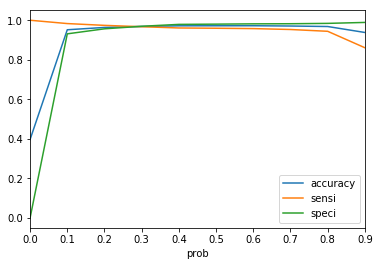

In [158]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [159]:
#Optimal point seems to be 0.3 for cut-off probability

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

Converted  Conversion_Prob    ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0         0.005260  1807    1    0    0    0    0    0    0    0   
1          0         0.001679  6261    1    0    0    0    0    0    0    0   
2          0         0.072272  1006    1    0    0    0    0    0    0    0   
3          0         0.001766  2051    1    0    0    0    0    0    0    0   
4          0         0.001623  5040    1    0    0    0    0    0    0    0   
5          1         0.970132  3051    1    1    1    1    1    1    1    1   
6          0         0.002261  1772    1    0    0    0    0    0    0    0   
7          0         0.001860   641    1    0    0    0    0    0    0    0   
8          1         0.993340  1359    1    1    1    1    1    1    1    1   
9          0         0.006214  2105    1    0    0    0    0    0    0    0   

   0.8  0.9  predicted  
0    0    0          0  
1    0    0          0  
2    0    0          0  
3    0    0          0  
4    0    0          0  
5    1    1          1  
6    0    0          0  
7    0    0          0  
8    1    1          1  
9    0    0          0

In [160]:
#Confusion Metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion_matrix

array([[3242,  102],
       [  72, 2128]], dtype=int64)

In [161]:
#Lets draw ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

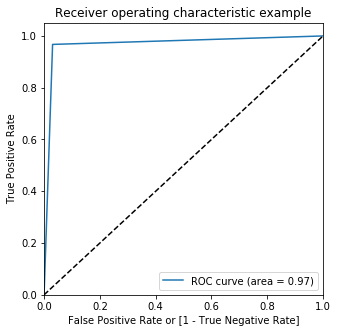

In [162]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.predicted)

ROC curve area = 0.97

In [163]:
#Lets Calculate Accuracy, Sensitivity and Specificity
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Accuracy: ", accuracy)

Sensitivity:  0.9672727272727273
Specificity:  0.9694976076555024
Accuracy:  0.9686147186147186


In [165]:
#lets now see FPR, TPR, Positive Predicted Value and Negative Predicted Value
fpr = FP/ float(TN+FP)
tpr = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN/float(TN+FN)

print('False Positive Ratio: ',fpr)
print('True Positive Ratio: ',tpr)
print('Positive Predicted Ratio: ', ppv)
print('Negative Predicted Ratio: ', npv)

False Positive Ratio:  0.030502392344497607
True Positive Ratio:  0.9672727272727273
Positive Predicted Ratio:  0.9542600896860987
Negative Predicted Ratio:  0.9782739891369946


In [166]:
#Lets Now also calculate Precision and Recall

# Precision and Recall

In [167]:
from sklearn.metrics import precision_score, recall_score

In [168]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9542600896860987

In [169]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9672727272727273

In [170]:
from sklearn.metrics import precision_recall_curve

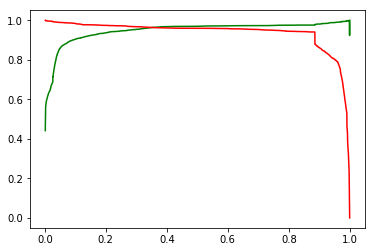

In [171]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [172]:
#Optimum Precision-Recall cut-off is 0.35

# Model Prediction

In [209]:
# Predicted probabilities
y_pred = res.predict(sm.add_constant(X_test[col]))

In [219]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

0
2149  0.001420
5091  0.943958
5612  0.026848
1036  0.002335
1067  0.012450

In [251]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
2149          0
5091          1
5612          0
1036          0
1067          0

In [260]:
# Putting CustID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['ID','Converted','Conversion_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

ID  Converted  Conversion_Prob
0   0          0         0.001420
1   1          1         0.943958
2   2          0         0.026848
3   3          0         0.002335
4   4          0         0.012450

In [261]:
# Creating new column 'predicted' with 1 
#if Conversion_Prob>0.3(which we had predicted from specificity/senstivity graph of train dataset)

y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)
# Let's see the head
y_pred_final.head()

ID  Converted  Conversion_Prob  predicted
0   0          0         0.001420          0
1   1          1         0.943958          1
2   2          0         0.026848          0
3   3          0         0.002335          0
4   4          0         0.012450          0

In [262]:
#Confusion Metrics
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion_matrix

array([[1367,   43],
       [  46,  921]], dtype=int64)

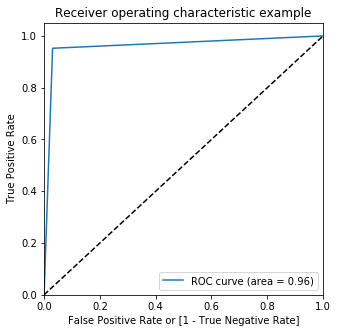

In [255]:
#Draw ROC Curve for Test Dataset
draw_roc(y_pred_final.Converted, y_pred_final.predicted)

In [256]:
#Lets Calculate Accuracy, Sensitivity and Specificity
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
print("Accuracy: ", accuracy)

Sensitivity:  0.9524301964839711
Specificity:  0.9695035460992908
Accuracy:  0.9625578460244005


In [257]:
#lets now see FPR, TPR, Positive Predicted Value and Negative Predicted Value
fpr = FP/ float(TN+FP)
tpr = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN/float(TN+FN)

print('False Positive Ratio: ',fpr)
print('True Positive Ratio: ',tpr)
print('Positive Predicted Ratio: ', ppv)
print('Negative Predicted Ratio: ', npv)

False Positive Ratio:  0.03049645390070922
True Positive Ratio:  0.9524301964839711
Positive Predicted Ratio:  0.9553941908713693
Negative Predicted Ratio:  0.967445152158528


In [258]:
#Calculate Precision Score
precision_score(y_pred_final.Converted, y_pred_final.predicted)

0.9553941908713693

In [259]:
#Calculate Recall Score
recall_score(y_pred_final.Converted, y_pred_final.predicted)

0.9524301964839711

# Precision-Recall Curve for Test Dataset

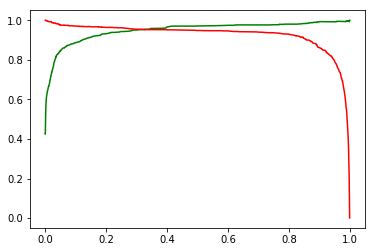

In [229]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [185]:
#Here also, I see that optimal cut-off for precision-recall is 0.35

In [230]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

ID  Converted  Conversion_Prob  predicted
0  2149          0         0.001241          0
1  5091          1         0.927414          1
2  5612          0         0.006674          0
3  1036          0         0.002879          0
4  1067          0         0.009945          0

In [231]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Conversion_Prob    ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0          0         0.005260  1807    1    0    0    0    0    0    0    0   
1          0         0.001679  6261    1    0    0    0    0    0    0    0   
2          0         0.072272  1006    1    0    0    0    0    0    0    0   
3          0         0.001766  2051    1    0    0    0    0    0    0    0   
4          0         0.001623  5040    1    0    0    0    0    0    0    0   

   0.8  0.9  predicted  
0    0    0          0  
1    0    0          0  
2    0    0          0  
3    0    0          0  
4    0    0          0

In [232]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['ID','Converted','Conversion_Prob','predicted']]
leads_train_pred.head()

ID  Converted  Conversion_Prob  predicted
0  1807          0         0.005260          0
1  6261          0         0.001679          0
2  1006          0         0.072272          0
3  2051          0         0.001766          0
4  5040          0         0.001623          0

In [233]:
# Dropping unnecessary columns from test dataset
leads_test_pred = leads_test_pred[['ID','Converted','Conversion_Prob','predicted']]
leads_test_pred.head()

ID  Converted  Conversion_Prob  predicted
0  2149          0         0.001241          0
1  5091          1         0.927414          1
2  5612          0         0.006674          0
3  1036          0         0.002879          0
4  1067          0         0.009945          0

In [234]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

ID  Converted  Conversion_Prob  predicted
0  1807          0         0.005260          0
1  6261          0         0.001679          0
2  1006          0         0.072272          0
3  2051          0         0.001766          0
4  5040          0         0.001623          0

In [235]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(5544, 4)
(2377, 4)
(7921, 4)


In [236]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['ID'].unique().tolist())

7921

# Calculate Lead Score

In [237]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['LeadScore'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

ID  Converted  Conversion_Prob  predicted  LeadScore
0  1807          0         0.005260          0          1
1  6261          0         0.001679          0          0
2  1006          0         0.072272          0          7
3  2051          0         0.001766          0          0
4  5040          0         0.001623          0          0

In [238]:
lead_full_pred = lead_full_pred.set_index('ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Conversion_Prob  predicted  LeadScore
ID                                                  
0           0         0.026173          0          3
1           0         0.004201          0          0
2           1         0.987894          1         99
3           0         0.002149          0          0
4           1         0.985824          1         99

In [239]:
# Slicing the Lead Number column from leads dataframe which was used for modelling.
lead_split_df1 = lead_split_df['Lead Number']
lead_split_df1.shape

(7921,)

In [196]:
lead_full_pred.shape

(7921, 4)

In [240]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done so that Lead Score is associated to the Lead Number of each Lead. 
#This will help in quick identification of the lead.

lead_full_pred = pd.concat([lead_split_df1, lead_full_pred], axis=1)
lead_full_pred.head(10)

Lead Number  Converted  Conversion_Prob  predicted  LeadScore
0       660737          0         0.026173          0          3
1       660728          0         0.004201          0          0
2       660727          1         0.987894          1         99
3       660719          0         0.002149          0          0
4       660681          1         0.985824          1         99
5       660680          0         0.001258          0          0
6       660673          1         0.989727          1         99
7       660664          0         0.001346          0          0
8       660624          0         0.001501          0          0
9       660616          0         0.001471          0          0

# Calculate Conversion Ratio

In [241]:
lead_full_pred = lead_full_pred.sort_values(by='Conversion_Prob', ascending=False)
lead_full_pred.head()

Lead Number  Converted  Conversion_Prob  predicted  LeadScore
5719       598991          1         0.999970          1        100
6218       594038          1         0.999966          1        100
6776       589305          1         0.999954          1        100
3637       620454          1         0.999925          1        100
6436       592240          1         0.999922          1        100

In [242]:
#Lets see conversion Ratio with Cut-off 0.35 (which we had got from Precision-Recall Curve)
conv_df = lead_full_pred[lead_full_pred['Conversion_Prob']>0.35]
print('New Conversion Ratio: ',conv_df['Converted'].sum()/len(conv_df))

New Conversion Ratio:  0.9617330803289058


In [243]:
#I see that conversion ratio is 96%. But our requirement is to come up with 80% conversion rate.
#so, lets change cut-off probability to 0.2.
conv_df = lead_full_pred[lead_full_pred['Conversion_Prob']>0.2]
print('New Conversion Ratio: ',conv_df['Converted'].sum()/len(conv_df))

New Conversion Ratio:  0.9355034986309705


In [244]:
#lets change cut-off probability to 0.1.
conv_df = lead_full_pred[lead_full_pred['Conversion_Prob']>0.05]
print('New Conversion Ratio: ',conv_df['Converted'].sum()/len(conv_df))

New Conversion Ratio:  0.8554183813443073


In [202]:
#I see that after selecting cut-off proability as 5%, we can get conversion ratio as 85%.

# Observations

#### Metrics Results from Train Dataset:
- Accuracy - 0.968
- Sensitivity - 0.967
-Specificity - 0.969

- Precision - 0.954
- Recall - 0.967

#### Metrics Results from Test Dataset:
- Accuracy - 0.961
- Sensitivity - 0.954
- Specificity - 0.966

- Precision - 0.951
- Recall - 0.954

#### Most Important Variables affecting Lead Scores:
- Tags_Closed by Horizzon (Positively Impacted)
- Tags_Lost to EINS (Positively Impacted)
- Tags_Will revert after reading the email (Positively Impacted)
- Last Notable Activity_SMS Sent (Positively Impacted)
- Total Time Spent on Website (Positively Impacted)
- Tags_Ringing (Negatively Impacted)
- Tags_switched off (Negatively Impacted)
- Lead Quality_Worst (Negatively Impacted)


# Recommendations:
- Company should improve their communication methods like SMS, Emails as we saw that customers who want to be engaged through emails/sms are our potential leads.
- There should be an improvement in Website's UI. More the user is engaged, more are the chances of that cutomer to become are hot lead.
- Company should not waste their efforts calling to worst lead quality customers as they almost are never interested in taking up the course.
- Company should add an option to verify Phone number and e-mail addresses of all customers when they fill up the form. Because non-interested customers may give us their dead sim numbers or wrong phone numbers. This way we will be able to eliminate wasting our efforts behind such customers.
- Follow up calls to a qualified lead. The more we delay to reach out to a qualified lead, the lower the chances of conversion.
- Re-checking the model’s lead conversion ratio and lead score on a routine basis.
- The users should be able to access information faster in a website. So keeping a check on the performance of the website will also affect the conversion rate.